In [1]:
# this tutorial makes use of pandas, numpy, and palettable
import pandas as pd
import numpy as np
import palettable
import mafparser
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# CoMut Tutorial

This notebook gives a more in depth tutorial of the functions and arguments of the CoMut package using some simulated data. The tutorial is meant to be read from beginning to end, as we walkthrough building a entire CoMut with simulated data.

You should run all the cells in this notebook before beginning the tutorial. Do this by clicking `Run` -> `Run All Cells`

# Table of Contents

1. [Installation](#Installation)
2. [Basic Usage](#Basic_Usage)  
    2.1 [Principles of Adding Data - Tidy Data](#data_principles)  
    2.2 [Principles of Plotting the CoMut](#plotting_principles)
3. [Adding Data to CoMut](#adding_functions)  
    3.1 [Categorical Data](#categorical_data)  
    3.2 [Adding Additional Data](#adding_other_data)  
    3.3 [Adding Continuous Data](#continuous_data)  
    3.4 [Adding Bar Data](#bar_data)  
    3.5 [Adding Sample Indicators](#indicator_data)  
    3.6 [Adding Side Bar Data](#side_bar_data)  
4. [Plotting the CoMut](#plot_comut)  
    4.1 [Altering Global Matplotlib Params](#rc_params)  
    4.2 [Arguments of plot_comut](#plot_comut_args)  
    4.3 [Editing Individual Axes](#axes_editing)  
5. [Adding a Legend](#add_legend)  
    5.1 [Add Unified Legend](#unified_legend)  
    5.2 [Add Axis Legends](#axis_legends)  
6. [Putting it All Together](#all_together)
7. [Exporting the CoMut](#export)
8. [What to do if you're unfamiliar with Pandas](#pandas_help)
9. [An example with data from Liu et. al](#melanoma_example)

# 1. Installation

CoMut can be installed via `pip` with `pip install comut`. Once installed, it can be imported with `import comut`

In [2]:
#!pip install comut
import comut

<a id="Basic_Usage"></a>

# 2. Basic Usage

Making CoMut plots using this package revolves around the `CoMut` object. A CoMut object is instantiated with `comut.CoMut()`. This will always be the first step in building a comut.

In [3]:
toy_comut = comut.CoMut()

A CoMut object has 3 attributes that users will manage to plot CoMuts. They are as follows:

1. `comut.samples`: A list of samples. This specifies the order of the CoMut's samples (from left to right) as columns in the CoMut.
2. `comut.axes`: A dictionary that contains the [axis objects](https://matplotlib.org/api/axes_api.html) after the CoMut is plotted. Not created until `comut.plot_comut()` is called. This is probably the most important attribute, as you will often be editing the axes directly to customize your CoMut after it is plotted.
3. `comut.figure`: The [figure](https://matplotlib.org/api/figure_api.html) on which the CoMut is created. Not created until `comut.plot_comut()` is called.

These are called by just using `comut_name.attribute`. For example, we can examine the axes that are currently in our comut:

In [4]:
toy_comut.axes

{}

As expected, it is an empty dictionary because we haven't plotted any data. `comut.axes` will eventually contain axes objects after we add data to the CoMut and call `comut.plot_comut()` to plot the CoMut.

<a id="data_principles"></a>
## 2.1 Principles of Adding Data

Generally, data is added to the CoMut object using functions like `comut.add_xxx_data()` (ex: `comut.add_categorical_data()`). Data is added to the CoMut object from the __bottom -> up__, which means that the first dataset added to the CoMut object will be the lowest in the comut.

__Note__: All functions that add data to the CoMut have an optional argument `name`. This parameter sets the name of the plot, which is important for editing the axes later. If this name is not specified, it defaults to the integer order in which it was added (so the first dataset has `name = 0`, etc).

### Tidy dataframes

CoMut makes use of tidy pandas dataframes to add data to the CoMut object. [Tidy data](https://vita.had.co.nz/papers/tidy-data.pdf) means that each observation should be a row and each variable should be a column. [pandas](https://pandas.pydata.org/docs/) is a python library for handling dataframes. Here's an example of a tidy pandas dataframe:

In [5]:
data = {'sample':['patient1', 'patient2','patient3'], 'category':['TP53', 'MYC', 'BRAF'], 'value':['Missense', 'Nonsense', 'Splice site']}
tidy_data = pd.DataFrame(data)
tidy_data

,sample,category,value
0,patient1,TP53,Missense
1,patient2,MYC,Nonsense
2,patient3,BRAF,Splice site


__Note__: If you're unfamiliar with pandas, see the section [What to do if you're unfamiliar with pandas](#pandas_help)

Each `comut.add_xxx_data()` function requires a tidy pandas dataframe as its input data, though its exact format depends on the exact type of data you're adding. Each function also has various arguments that allow you to change how the data is added and how it appears in the comut (see [Functions to Add Data](#adding_functions))

In [6]:
toy_comut = comut.CoMut()
toy_comut.add_categorical_data(tidy_data)

<a id="plotting_principles"></a>
## 2.2 Principles of Plotting the CoMut

Once all the requisite data is added to the CoMut, it can be created with `comut_name.plot_comut()`. This will plot all the data added to the CoMut. There are a number of arguments that can be passed to `plot_comut()` that allow you to alter the appearance of the CoMut (see [plot_comut arguments](#plot_comut)). Here's an extremely basic plot of the tidy data we just added:

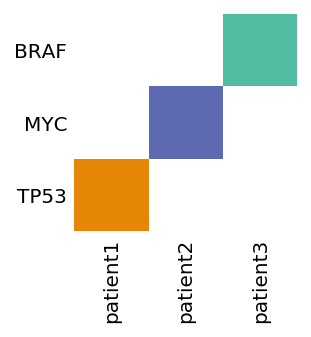

In [7]:
toy_comut = comut.CoMut()
toy_comut.add_categorical_data(tidy_data)
toy_comut.plot_comut(figsize = (2,2))

<a id="adding_functions"></a>
# 3. Adding Data to CoMut

Most CoMuts have a mixture of data types. Most common data types that are present in CoMuts are supported by the CoMut package. Supported data types include:

1. [Categorical data](#categorical_data): Data that has categories and discrete values. The central portion of the CoMut, the mutation data, is usually composed of categorical data. Various categories (genes) have discrete values (type of mutation). Clinical data (eg gender, tumour type, etc) is usually categorical as well. This data type is supported by `comut.add_categorical_data`

2. [Continuous data](#continuous_data): Data that has a category but continuous values. A very common example is tumour purity. This data type is supported by `comut.add_continuous_data`.

3. [Bar graphs](#bar_graphs): Data that applies to each sample and is usually continuous. Common examples include mutation burden or mutational signatures. This data type is supported by `comut.add_bar_data`

4. [Side bar graphs](#side_bar_graphs): Data that applies to categories in one of the categorical plots. Common examples include the number of smaples mutated in a gene or a q-value indicating significance of recurrence for a gene. This data type is supported by `comut.add_side_bar_data`

5. [Sample indicators](#sample_indicators): Data that shows how samples are related. For example, this can be used to indicate samples from the same patient. This data type is supported by `comut.add_sample_indicators`.

Here is the CoMut generated by the CoMut package in `melanoma_example.ipynb`, where each data type is indicated. Sample indicators have been added for demonstration purposes.

<img src="tutorial_data/data_types.png">

<a id="categorical_data"></a>
## 3.1 Categorical Data

3.1.1 [Categorical data formatting](#cat_data_formatting)  
3.1.2 [Adding categorical data to CoMut](#adding_cat_data)  
3.1.3 [CoMut categorical behavior - Absent, Multiple, and Not Available](#cat_reserved_categories)  
3.1.4 [add_categorical_data arguments](#add_cat_data_args)  
3.1.5 [Controlling color with `mapping`](#cat_mapping)

Categorical data forms the central portion of the CoMut and is the most important data type. In the context of the CoMut package, any data that is __categorical__ is added and plotted the same way. There are 3 fundamental attributes to categorical data - __sample__, __category__, and __value__.

For mutation data, this data is usually contained in a MAF or VCF file. The __category__ is the gene (eg TP53), and the __value__ is the type of mutation (eg Missense). For copy number alterations, the __category__ is gene, and __value__ as type of copy number alteration (eg amplification).

Clinical data is also usually categorical. For example, we might want to plot the biopsy site of our samples. In this case, __category__ would be biopsy site, and __value__ would be something like liver.

__sample__, __category__, and __value__ are more than just ways of thinking about the data you're adding - they're also required columns in your categorical data (see below).

<a id="cat_data_formatting"></a>
### 3.1.1 Categorical data formatting

Like all data that is added to the CoMut, categorical data must be in tidy format. There are three required columns: `sample`, `category`, and `value`. Other columns are ignored. Here is the same example from before:

In [8]:
data = {'sample':['patient1', 'patient2','patient3'], 'category':['TP53', 'MYC', 'BRAF'], 'value':['Missense', 'Nonsense', 'Splice site']}
tidy_data = pd.DataFrame(data)
tidy_data

,sample,category,value
0,patient1,TP53,Missense
1,patient2,MYC,Nonsense
2,patient3,BRAF,Splice site


<a id="adding_cat_data"></a>
### 3.1.2 Adding categorical data to CoMut

Categorical data is added to the CoMut object with `comut.add_categorical_data`. Here we can add categorical data and plot the CoMut, though it won't look very pretty:

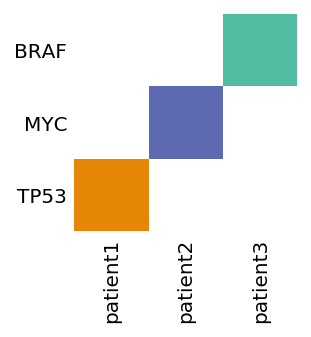

In [9]:
toy_comut = comut.CoMut()
toy_comut.add_categorical_data(tidy_data)
toy_comut.plot_comut(figsize = (2,2))

<a id="cat_reserved_categories"></a>
### 3.1.3 CoMut categorical behavior - Absent, Multiple, and Not Available

There are three "reserved" categories for categorical data, meaning that CoMut will create and plot them for you if needed. They are as follows:

1. __Absent__ - This is what the CoMut depicts when a sample doesn't have a value for a category. For example, in the basic 3x3 CoMut above, patient1 does not have a MYC mutation. By default, Absent samples are shown in white.

2. __Multiple__ - This is what the CoMut depicts when a sample has more than two values for a category. Note that two values for a category are shown as __two triangles__.

3. __Not Available__ - Sometimes, data is not available for a sample in a given category. Rather than leave it out (and showing the square as white in the CoMut), it can be desirable to indicate that the data is unavailable or was not measured. CoMut identifies samples that have `'Not Available'` as a value and plots them as a box with a slash through it. An example of this usage can be found in `melanoma_example.ipynb`

These reserved categories can be altered through the use of [add_categorical_data](#add_cat_data_args)'s `mapping` argument. Here's an example that shows these reserved categories in action:

     sample category          value
0  patient1     TP53       Missense
1  patient1     TP53       Nonsense
2  patient2     BRAF    Splice site
3  patient2     BRAF       Nonsense
4  patient2     BRAF       Missense
5  patient3      MYC  Not Available


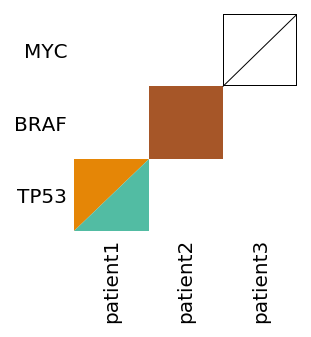

In [10]:
data = {'sample':['patient1', 'patient1','patient2', 'patient2', 'patient2', 'patient3'], 
        'category':['TP53', 'TP53', 'BRAF', 'BRAF', 'BRAF', 'MYC'], 
        'value':['Missense', 'Nonsense', 'Splice site', 'Nonsense', 'Missense', 'Not Available']}
tidy_data = pd.DataFrame(data)
print(tidy_data)

toy_comut = comut.CoMut()
toy_comut.add_categorical_data(tidy_data, name = 'mutations')
toy_comut.plot_comut(figsize = (2,2))

Because Patient1 has 2 mutations in TP53, they are shown as triangles. Patient2 has three mutations in BRAF, so it is shown as `Multiple` (defaults to brown). Patient3 has `Not Available` as its value for MYC, so it is shown as a box with a slash through it.

<a id="add_cat_data_args"></a>
### 3.1.4 - `add_categorical_data` arguments

The scope and appearance of categorical data in the CoMut can be controlled with `add_categorical_data`. Here is a full list of its arguments:

* `data` - The data being added to the CoMut, in the form of a tidy pandas dataframe. See [Categorical data formatting](#cat_data_formatting)

* `name` - The name of the plot being added to the CoMut, as a string. This is used to edit axes later, add side bar plots, and put titles in a unified legend. If not given, it will default to the integer number of plots currently in the plot - 1.

* `category_order` - This argument is a list sets the order that categories appear, from __bottom to top__. You can use this to change the order of genes in the CoMut. Categories present in this list but not in the data will be plotted, with the value `'Absent'` assigned to all samples. Defaults to all unique categories present in data in the order they appear in the data.

* `value_order` - A list that determines the order values are plotted within a single patch in the CoMut, from left triangle to right triangle. For example, if the Amp and Del values should always be the upper left triangle when the other alteration is a Missense, value_order would be ['Amp', 'Del, 'Missense']. In this case, if an Amp and Del were present in the same category and sample, Amp would be drawn as the left triangle (since it comes before Del in `value_order`). Defaults to an alphabetical ordering of all unique values in the data.

* `mapping` - a dictionary that maps values to colors. The dictionary keys should be the data values (eg 'Missense'), with dictionary values as either a valid color option or patches_kwargs. For more details, see [Controlling color with `mapping`](#cat_mapping).

* `borders` - a list that allows you to set some of the values as a border for a patch. Note that the mapping for these values must have `'facecolor':'none'` if given as a `patches_kwargs` dictionary.

* `priority` - a list that allows you to give priority to certain values. This subverts the multiple classification. For example, if Amplifications should always be shown even if there are multiple other alterations, one might use `priority = ['Amplification']`. This would cause samples with two mutations and an amplification in the same gene to show a brown triangle and a red triangle, rather than a brown square.

* `tick_style` - a string that allows you to control the way yticklabels look. It defauls to normal, but most categorical variables that involve genes will use `tick_style = 'italic'`

__Example__

Here is some tidy data to put in the CoMut:

In [11]:
data = {'sample':['patient1', 'patient1','patient2', 'patient2', 'patient3', 'patient3', 'patient3'], 
        'category':['TP53', 'TP53', 'TP53', 'TP53', 'BRAF', 'BRAF', 'BRAF'], 
        'value':['Missense', 'Nonsense', 'Missense', 'LOH','Splice site', 'Nonsense', 'Amplification']}
tidy_data = pd.DataFrame(data)
tidy_data

,sample,category,value
0,patient1,TP53,Missense
1,patient1,TP53,Nonsense
2,patient2,TP53,Missense
3,patient2,TP53,LOH
4,patient3,BRAF,Splice site
5,patient3,BRAF,Nonsense
6,patient3,BRAF,Amplification


Here is this plot with default `add_categorical_data()` values:

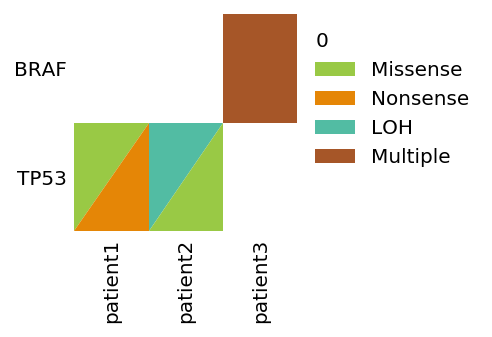

In [12]:
toy_comut = comut.CoMut()
toy_comut.add_categorical_data(tidy_data)
toy_comut.plot_comut(figsize = (2,2))

# The legend will use name = 0, since that is the name of plot if none is specified
toy_comut.add_unified_legend()

We'll change `add_categorical_data` to achieve the following:

* Use `name` to add a name for the plot that appears in the legend
* Use `mapping` to change patch colors
* Use `category_order` to switch the order of TP53 and BRAF
* Use `value_order` to make it so that Nonsense appears above Missense in patient1 for TP53
* Use `borders` to turn `LOH` into a border
* Use `priority` to make `Amplification` be shown in patient3 for BRAF
* Use `tick_style` to make the gene names italic

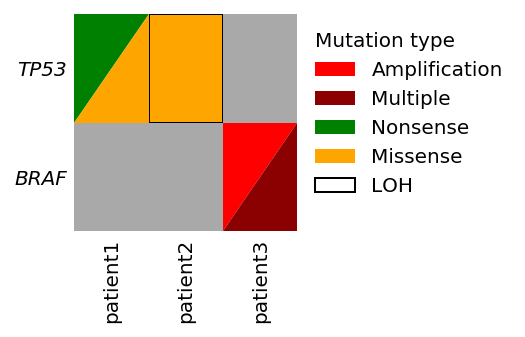

In [13]:
# make the absent patches grey and the multiple dark red
mut_mapping = {'Absent': 'darkgrey', 'Missense': 'orange', 'Nonsense': 'green', 
               'Splice site': 'blue', 'Multiple': 'darkred', 'LOH':'black', 'Amplification':'red'}

# make TP53 be at the top
category_order = ['BRAF', 'TP53']

# make nonsense be the upper left triangle instead of missense
value_order = ['Nonsense', 'Missense']

# make LOH a border
borders = ['LOH']

# give amplification priority so that it is always shown
priority = ['Amplification']

toy_comut = comut.CoMut()
toy_comut.add_categorical_data(tidy_data, name = 'Mutation type', mapping = mut_mapping, category_order = category_order, value_order = value_order, 
                               borders = borders, priority = priority, tick_style = 'italic')
toy_comut.plot_comut(figsize = (2,2))
toy_comut.add_unified_legend()

We can see that Nonsense is now above Missense in patient1 TP53, LOH is now plotted as a border, and amplification is given priority and shown even when there are multiple mutations.

<a id="cat_mapping"></a>
### 3.1.5 - Controlling color with `mapping`

`mapping` is perhaps the most important `add_categorical_data` argument. It determines the properties of the patches (or squares) that appear on the CoMut. 

To fully specify mapping, the categories `'Absent'` and `'Multiple'` should be included in your mapping. The mapping dictionary can be of two different forms:

1. `{value: matplotlib color option}`. Matplotlib recognizes a wide variety of color options, explained [here](https://matplotlib.org/3.1.1/api/colors_api.html). For example, your mapping dictionary might look like this: `{'Missense': 'blue', 'Nonsense': (0.5, 0.25, 0.1), 'Splice site': '#8b0000'}`, using a string, an RGB color tuple, and hex code respectively.

2. `{value: patches_kwargs}`: This option gives you more flexibility with the way the patches look. `patches_kwargs` is just a dictionary that is passed to the `patches` function when the comut squares are made. Example properties can be found [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Patch.html#matplotlib.patches.Patch). For example, you might want to control the transparency of a value's patch. You can do this with `alpha` like so: `{'Missense': {'facecolor': 'orange', 'alpha': 0.5}}`. For borders, you can use arguments like `{'LOH': {'facecolor': 'none', 'edgecolor': 'black', 'linewidth': 0.5}}` to change properties of the border.

Here's an like that of 3.1.4's plot, except with a more complicated `mapping` form

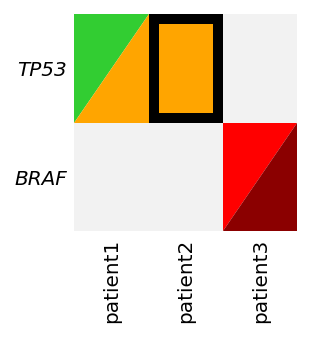

In [14]:
# make the absent patches a washed out grey and the multiple dark red
updated_mapping = {'Absent': {'facecolor': 'grey', 'alpha': 0.1}, 'Missense': 'orange', 'Nonsense': '#32CD32', 
               'Splice site': 'blue', 'Multiple': 'darkred', 'LOH':{'facecolor':'none', 'edgecolor':'black', 'linewidth':10}, 'Amplification':(1,0,0)}

toy_comut = comut.CoMut()
toy_comut.add_categorical_data(tidy_data, name = 'mutations', mapping = updated_mapping, category_order = category_order, value_order = value_order, 
                               borders = borders, priority = priority, tick_style = 'italic')
toy_comut.plot_comut(figsize = (2,2))

Here's an example with the dataset scaled up so we can see how a CoMut dataset looks:

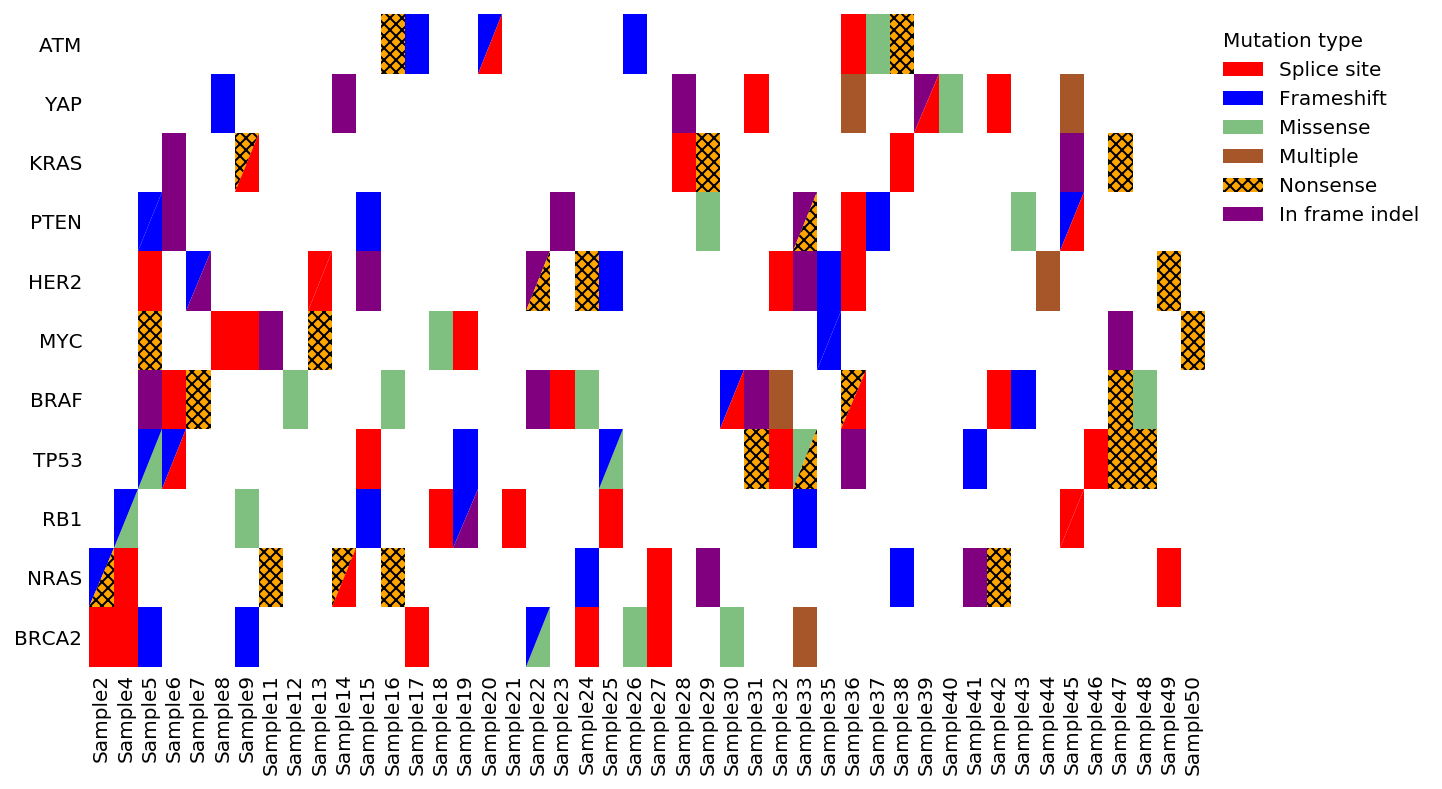

In [15]:
# import randomly simulated mutation data
mut_df = pd.read_csv('tutorial_data/tutorial_mutation_data.tsv', sep = '\t')

# specify mapping - increase transparency of green and add a hatch to Nonsense
mapping = {'Missense': {'facecolor':'green', 'alpha': 0.5}, 'Nonsense': {'facecolor':'orange', 'hatch': 'xxxx'},
           'Splice site': 'red', 'Frameshift': 'blue', 'In frame indel': 'purple'}

# make the CoMut and add the data
toy_comut = comut.CoMut()
toy_comut.add_categorical_data(mut_df, name = 'Mutation type', mapping = mapping)
toy_comut.plot_comut(figsize = (10,6))
toy_comut.add_unified_legend()

<a id="adding_other_data"></a>
## 3.2 Adding additional data after adding first dataset

Once a dataset has been added to the CoMut object, you can add additional datasets to it to build the CoMut upwards. As a trivial example, we can try adding the same dataset twice:

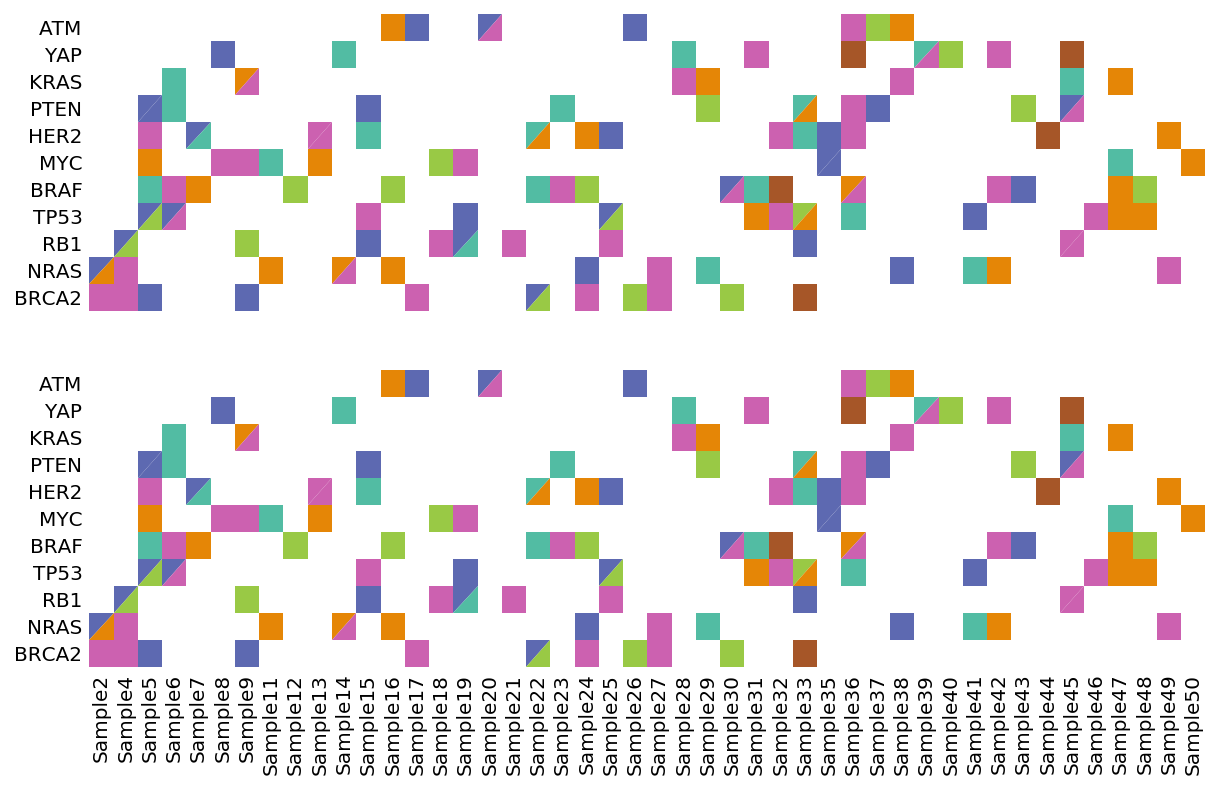

In [16]:
toy_comut = comut.CoMut()
toy_comut.add_categorical_data(mut_df)
toy_comut.add_categorical_data(mut_df)
toy_comut.plot_comut(figsize = (10,6))

You can run into issues, however, if you try to add data that includes samples that were not included in the first data that was added:

In [17]:
# say that we have biopsy site information for all 50 samples
biopsy_df = pd.read_csv('tutorial_data/tutorial_biopsy_site.tsv', sep = '\t')
biopsy_df.head()

,sample,category,value
0,Sample1,Biopsy site,Lung
1,Sample2,Biopsy site,Lung
2,Sample3,Biopsy site,Lung
3,Sample4,Biopsy site,Liver
4,Sample5,Biopsy site,Lung


In [18]:
# we can try to add it to the CoMut
toy_comut = comut.CoMut()
toy_comut.add_categorical_data(mut_df)

# the line below this comment will throw an error if uncommented - try it and see
# toy_comut.add_categorical_data(biopsy_df)

This error exists because some of the samples in our mutation data had no mutations. Thus they didn't exist anywhere in the mutation dataframe, so CoMut didn't know the samples existed. 

In general, __all data added must contain a subset of the first samples added__. In our case, the reason the error was thrown is because `Sample1` didn't exist in the mutation data, but we tried to add it with clinical data.

The way to get around this is to set the samples before any data is added to the comut. If future data doesn't contain these samples, they are simply plotted as blank patches (or in the case of continuous data and bar plots, given a value of 0).

In [19]:
samples = list(biopsy_df['sample'])

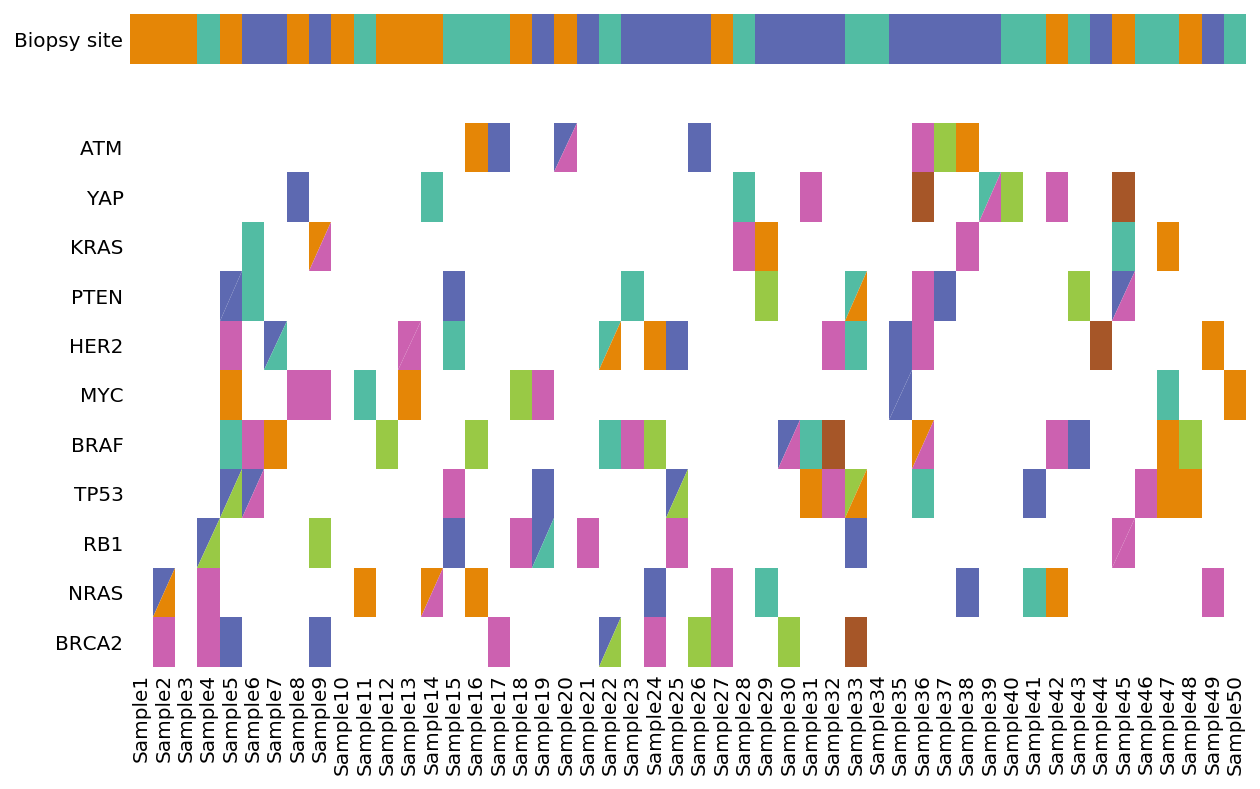

In [20]:
toy_comut = comut.CoMut()

# set the samples to begin with, before any data is added. If this is not set before data is added,
# it is determined by the first dataset added
toy_comut.samples = samples

toy_comut.add_categorical_data(mut_df)
toy_comut.add_categorical_data(biopsy_df)
toy_comut.plot_comut(figsize = (10,6))

For example, note that Sample 1 has no mutations and thus appears as a white column in the mutation data.

<a id="continuous_data"></a>
## 3.3 Adding Continuous Data

3.3.1 [Continuous data formatting](#cont_data_formatting)  
3.3.2 [Adding continuous data to CoMut](#adding_cont_data)  
3.3.3 [CoMut continuous behavior - Absent and Not Available](#cont_reserved_categories)  
3.3.4 [add_continuous_data arguments](#add_cont_data_args)  

You can also add continuous data to the CoMut plot. This process is very similar to adding categorical data, with the primary differences being the following:

1. Only one category is allowed at a time (so you cannot plot continuous data for multiple categories at once)
2. The mapping is a colormap, not a discrete mapping
2. The value range of the continuous data must be specified when it is added

<a id="cont_data_formatting"></a>
### 3.3.1 Continuous data formatting

Continuous data is also required to be a tidy pandas dataframe with columns `sample`, `category`, and `value`. The only difference is that `category` may only be one value for the dataframe, and the value should be a continuous number (or `Not Available`/`Absent`). 

For example, let's say we had purity information for all these samples:

In [21]:
purity_df = pd.read_csv('tutorial_data/tutorial_purity.tsv', sep = '\t')
purity_df.head()

,sample,category,value
0,Sample1,Purity,0.49
1,Sample2,Purity,0.39
2,Sample3,Purity,0.17
3,Sample4,Purity,0.97
4,Sample5,Purity,0.47


<a id="adding_cont_data"></a>
### 3.3.2 Adding continuous data to CoMut

The `add_continuous_data` is used to add continuous data to the CoMut. Its arguments are very similar to `add_categorical_data` (see [add_continuous_data arguments](#add_cont_data_args))

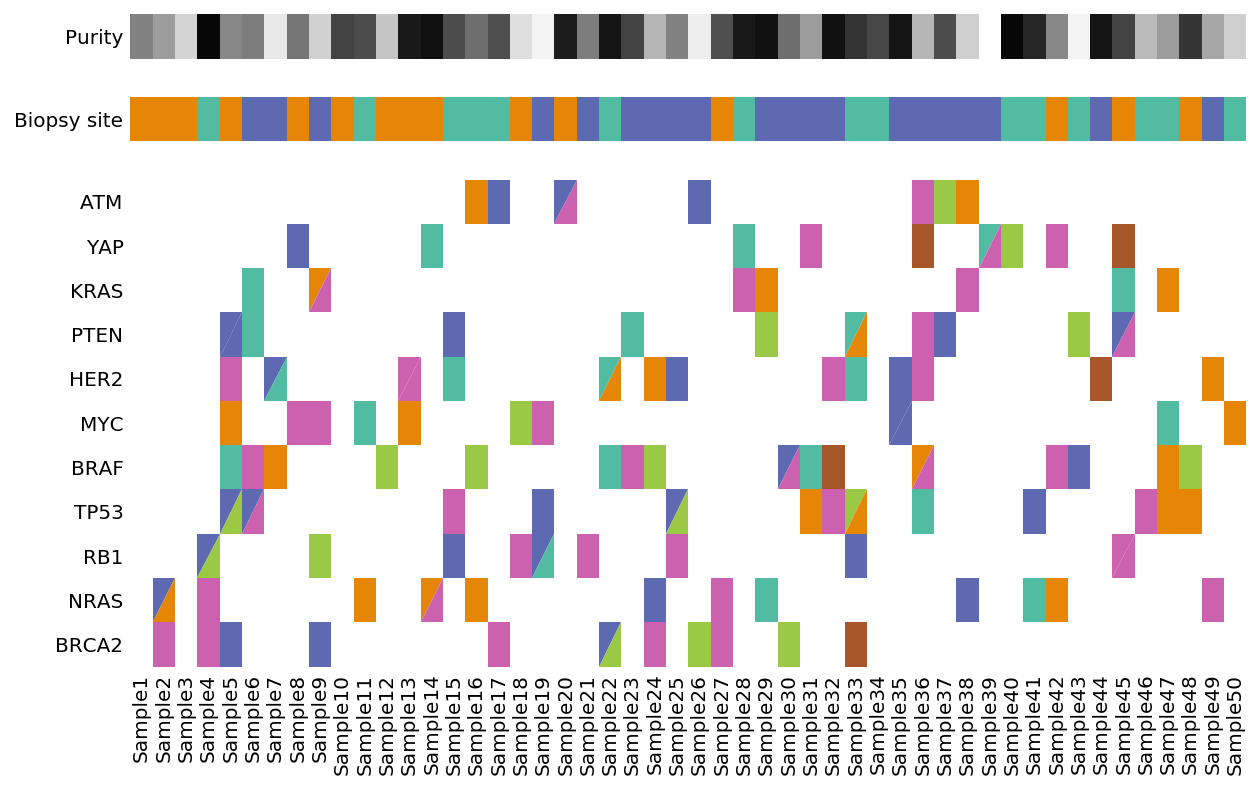

In [22]:
toy_comut = comut.CoMut()
toy_comut.samples = samples

toy_comut.add_categorical_data(mut_df)
toy_comut.add_categorical_data(biopsy_df)
toy_comut.add_continuous_data(purity_df)
toy_comut.plot_comut(figsize = (10,6))

<a id="cont_reserved_categories"></a>
### 3.3.3 - CoMut continuous behavior - Absent and Not Available

Like categorical data, continuous data has reserved categories that are used to increase CoMut clarity. Continuous data has two:

1. __Absent__ - This is what the CoMut depicts when a sample doesn't have a value for the continuous category. These samples are missing from the continuous tidy dataframe and are by default depicted as white patches.

2. __Not Available__ - Exactly as in categorical data, CoMut will identify data labelled as `Not Available` and draw a box with a slash through it.

These reserved categories can be altered through the use of [add_continuous_data](#add_cat_data_args)'s `cat_mapping` argument. Here's an example that shows these reserved categories in action:

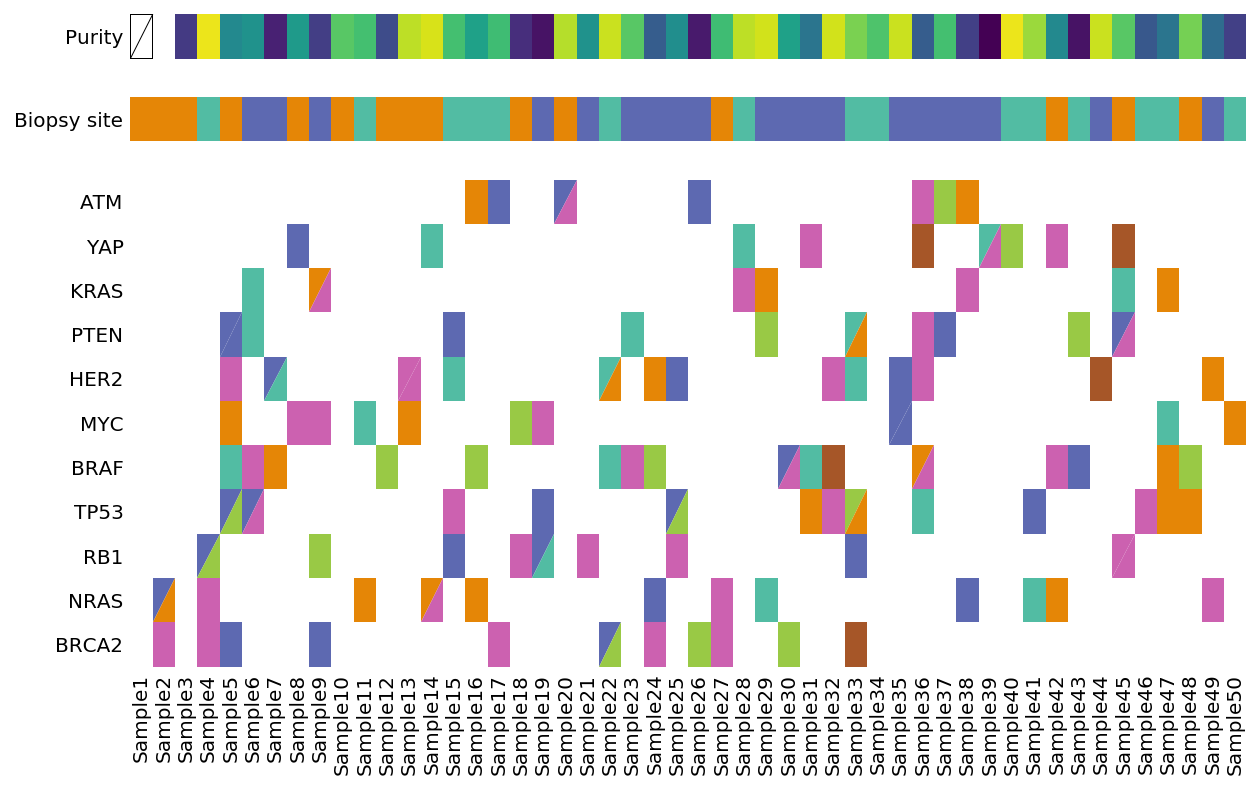

In [23]:
altered_purity_df = purity_df.copy()

# change Sample1 to not available and remove Sample2 (ie absent)
altered_purity_df = altered_purity_df.set_index('sample')
altered_purity_df.loc['Sample1', 'value'] = 'Not Available'
altered_purity_df = altered_purity_df.drop(index='Sample2')
altered_purity_df = altered_purity_df.reset_index('sample')
altered_purity_df.head()

# make CoMut
toy_comut = comut.CoMut()
toy_comut.samples = samples

toy_comut.add_categorical_data(mut_df)
toy_comut.add_categorical_data(biopsy_df)
toy_comut.add_continuous_data(altered_purity_df, mapping = 'viridis')
toy_comut.plot_comut(figsize = (10,6))

We can see that the purities for Sample1 and Sample2 are now drawn as a box with a slash and a white box, respectively

<a id="add_cont_data_args"></a>
### 3.3.4 `add_continuous_data` arguments

The scope and appearance of continuous data in the CoMut can be controlled with `add_continuous_data`. Here is a full list of its arguments:

* `data` - The data being added to the CoMut, in the form of a tidy pandas dataframe. See [Continuous data formatting](#cont_data_formatting)

* `name` - The name of the plot being added to the CoMut, as a string. This is used to edit axes later, add side bar plots, and put titles in a unified legend. If not given, it will default to the integer number of plots currently in the plot - 1.

* `mapping` - A mapping of continuous value to color. Can be defined as matplotlib colormap (str) or a custom LinearSegmentedColormap. Samples with missing information are colored white (and can be controlled via `cat_mapping`). See [here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) for a list of valid matplotlib colormaps. The default is binary (a white-black scale)

* `value_range` - A list that defines the lower and upper bound of the continuous data. It is used to calculate colors for the continuous data using the `mapping` colormap. For example, if your values could range from 0-10, `value_range` would be `[0,10]`. It defaults to `[0,1]`. 

* `cat_mapping` - A dictionary defining mapping from a discrete category to patch color. Primarily used to override defaults for 'Absent' and 'Not Available' but can be used to mix categorical and continuous values in the same data.

* `tick_style` - a string that allows you to control the way yticklabels look. It defauls to normal.

__Example__

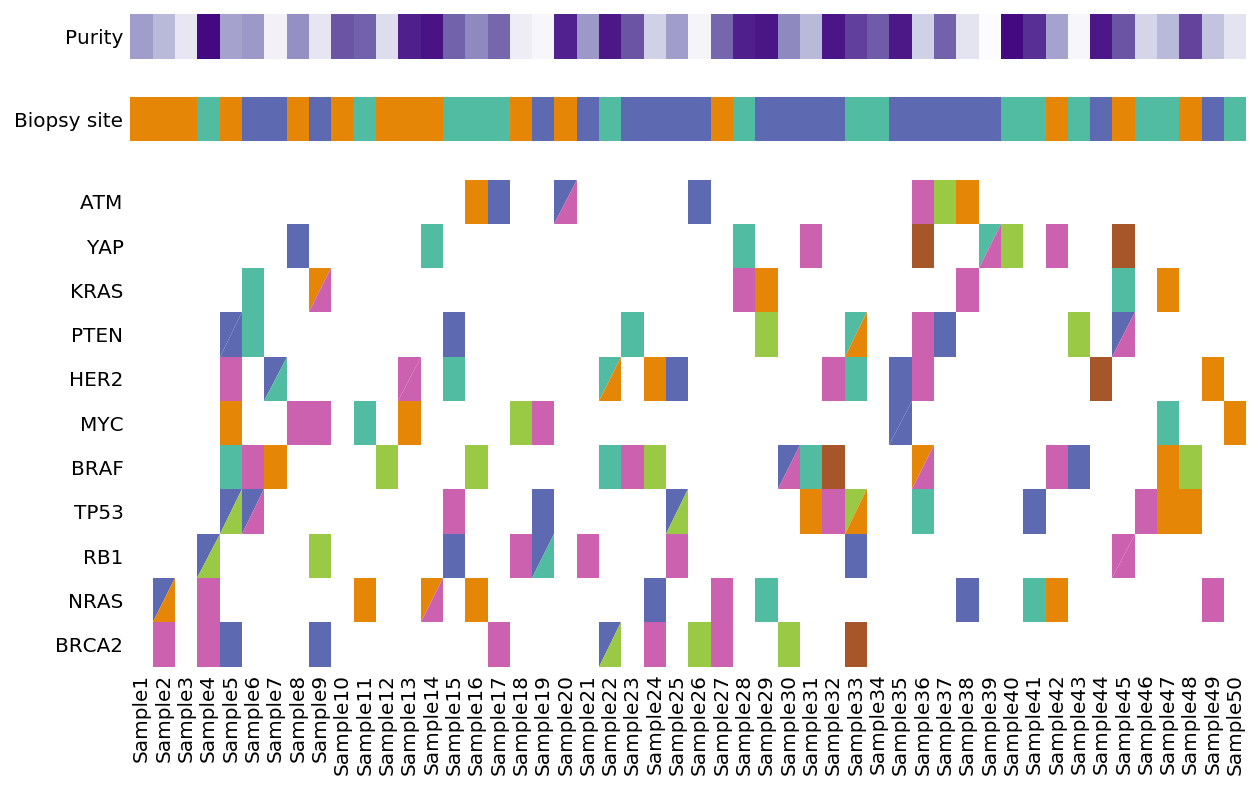

In [24]:
# make CoMut
toy_comut = comut.CoMut()
toy_comut.samples = samples

toy_comut.add_categorical_data(mut_df)
toy_comut.add_categorical_data(biopsy_df)
toy_comut.add_continuous_data(purity_df, mapping = 'Purples')
toy_comut.plot_comut(figsize = (10,6))

<a id="bar_data"></a>
## 3.4 Adding Bar Data

3.4.1 - [Bar data formatting](#bar_data_formatting)  
3.4.2 - [Adding bar data to CoMut](#adding_bar_data)  
3.4.3 - [add_bar_data arguments](#add_bar_data_args)  

Sample level bar graphs can also be added to the CoMut. Common examples of such data in CoMuts include mutation burden or mutational signatures. Bar graphs can either be a single bar column or be stacked.

__Note__: Bar graphs go in the central CoMut. Bar graphs added to the side of the CoMut are side bar graphs - see [Adding Side Bar Data](#side_bar_data) for details. 

<a id="bar_data_formatting"></a>
### 3.4.1 - Bar data formatting

Like all data added to the CoMut, the bar data must be a tidy pandas dataframe. Unlike categorical and continuous data, however, there is only one required column: `sample`. All other columns are interpreted to be plotted. This means that `add_bar_data` __does not__ ignore additional columns, unlike `add_categorical_data` and `add_continuous_data`.

As an example, let's say we have data for the mutation burden for each of these samples:

In [25]:
mut_burden_df = pd.read_csv('tutorial_data/tutorial_mutation_burden.tsv', sep = '\t')
mut_burden_df.head()

,sample,Nonsynonymous,Synonymous
0,Sample1,62,1
1,Sample2,67,26
2,Sample3,15,5
3,Sample4,17,6
4,Sample5,33,8


__Note__: `sample` must be the *first* column in the dataframe

<a id="adding_bar_data"></a>
### 3.4.2 - Adding bar data to CoMut

Bar data is added to the CoMut with `add_bar_data`. Because we want all our columns (Nonsynonymous and Synonymous) to be represented, we can use `stacked = True`.

Here's a simple example using the mutation burden data we imported:

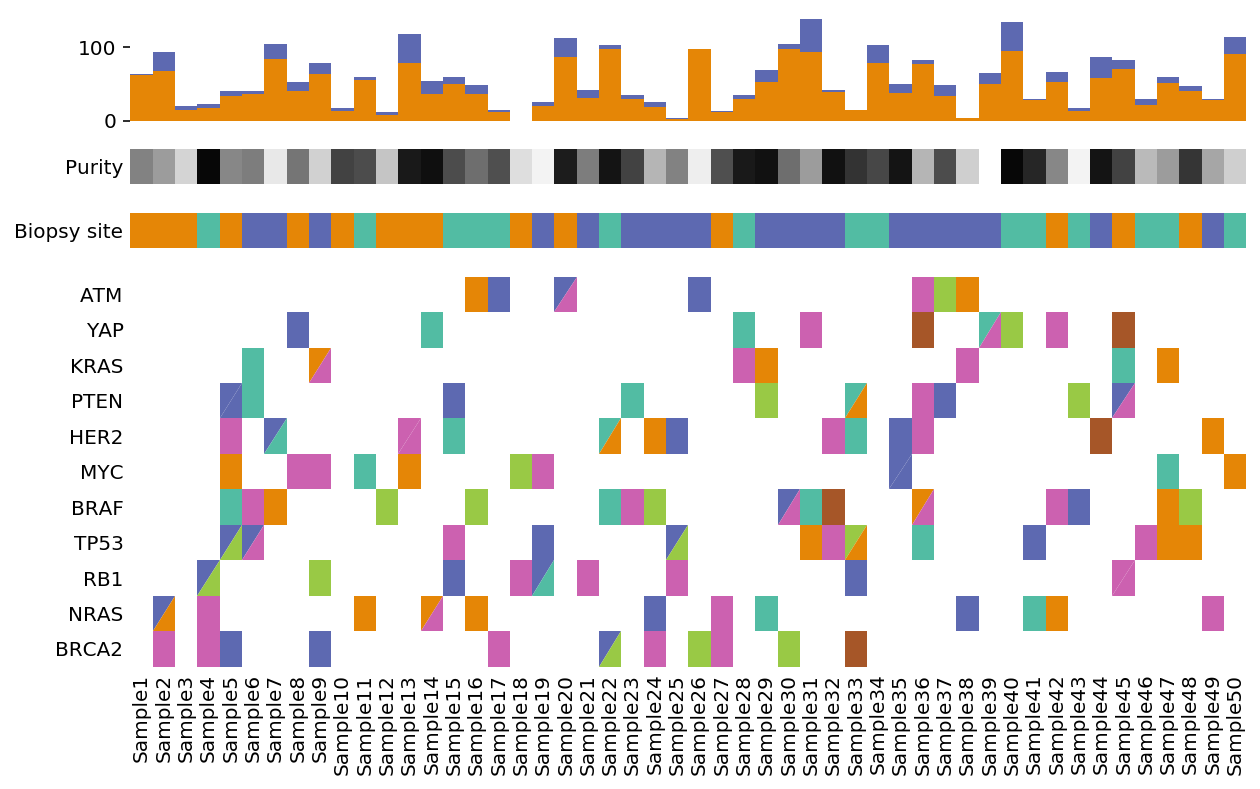

In [26]:
# make CoMut
toy_comut = comut.CoMut()
toy_comut.samples = samples

toy_comut.add_categorical_data(mut_df)
toy_comut.add_categorical_data(biopsy_df)
toy_comut.add_continuous_data(purity_df)
toy_comut.add_bar_data(mut_burden_df, stacked = True)

toy_comut.plot_comut(figsize = (10,6))

<a id="add_bar_data_args"></a>
### 3.4.3 - `add_bar_data` arguments

The scope and appearance of bar data in the CoMut can be controlled with `add_bar_data`. Here is a full list of its arguments:

* `data` - The bar data being added to the CoMut, in the form of a tidy pandas dataframe. The first column must be named `sample`, with other columns being the categories of the data. See [Bar data formatting](#bar_data_formatting)

* `name` - The name of the plot being added to the CoMut, as a string. This is used to edit axes later and put titles in a unified legend. If not given, it will default to the integer number of plots currently in the plot - 1.

* `stacked` - A boolean for if the data should be stacked or not. Defaults to `False`. Stacked bar graphs will stack by column from left to right, with the the first non-sample column being the bottom-most part of the stack. If `False` and multiple non-sample columns are present, the first non-sample column is used.

* `mapping` - A mapping of column to color. Dictionary should map column name to color (str) as a dictionary.

* `ylabel` - A string with which to label the y axis. Defaults to an empty string, so no y label is given.

* `bar_kwargs` - A dictionary of kwargs to pass to plt.bar during the process of plotting. See [here](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.bar.html) for a full description of possible arguments.

__Example__

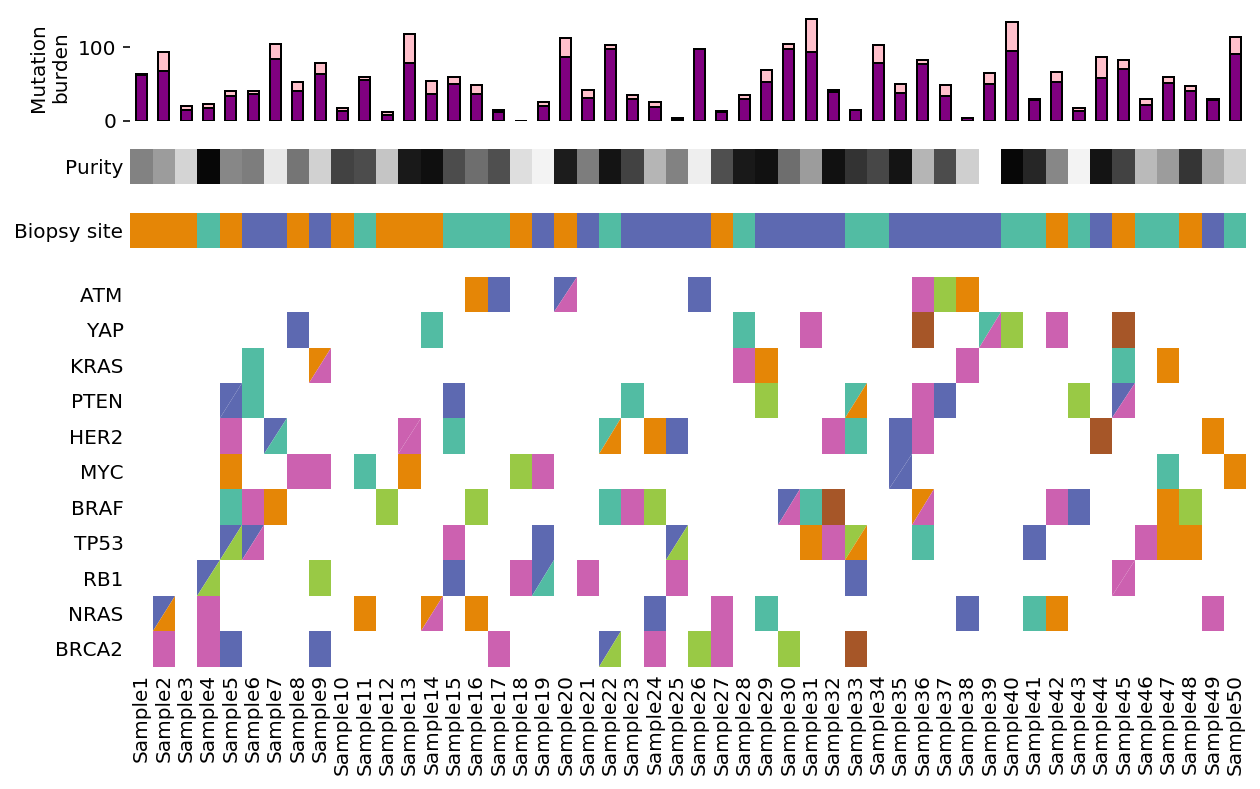

In [27]:
# make CoMut
toy_comut = comut.CoMut()
toy_comut.samples = samples

toy_comut.add_categorical_data(mut_df)
toy_comut.add_categorical_data(biopsy_df)
toy_comut.add_continuous_data(purity_df)

# define a mapping, then add the bar data.
bar_mapping = {'Nonsynonymous': 'purple', 'Synonymous': 'pink'}

# use bar_kwargs to add black edges and shrink bar width
bar_kwargs = {'edgecolor': 'black', 'width': 0.5}

# add bar data
toy_comut.add_bar_data(mut_burden_df, stacked = True, mapping = bar_mapping, bar_kwargs = bar_kwargs, ylabel = 'Mutation\nburden')

toy_comut.plot_comut(figsize = (10,6))

<a id="indicator_data"></a>
## 3.5 Adding Sample Indicators

3.5.1 - [Sample indicator data formatting](#sample_indicator_data_formatting)  
3.5.2 - [Adding sample indicators to CoMut](#adding_sample_indicators)  
3.5.3 - [add_sample_indicators_data arguments](#add_sample_indicators_args)  

Sample indicators are small pieces of data usually located at the bottom of the CoMut. They depict how samples are related, usually if the samples are from the same patient. 

<a id="sample_indicator_data_formatting"></a>
### 3.5.1 Sample indicator data formatting

Sample indicators are added to the CoMut as tidy pandas dataframes. There are two required columns: `sample` and `group`. Other columns will be ignored. The values of group do not matter, as long as they are the same for samples that belong in a group. For example, let's say some of our samples come from the same patient(s):

In [28]:
indicator_df = pd.read_csv('tutorial_data/tutorial_indicator.tsv', sep = '\t')
indicator_df.head()

,sample,group
0,Sample1,0
1,Sample2,0
2,Sample3,1
3,Sample4,1
4,Sample5,1


<a id="adding_sample_indicators"></a>
### 3.5.2 Adding sample indicators to CoMut

Sample indicators are added to the CoMut with `add_sample_indicators`. Note that samples in the same group __must__ be adjacent to each other in the sample order of the CoMut. If they are not, you will get an error.

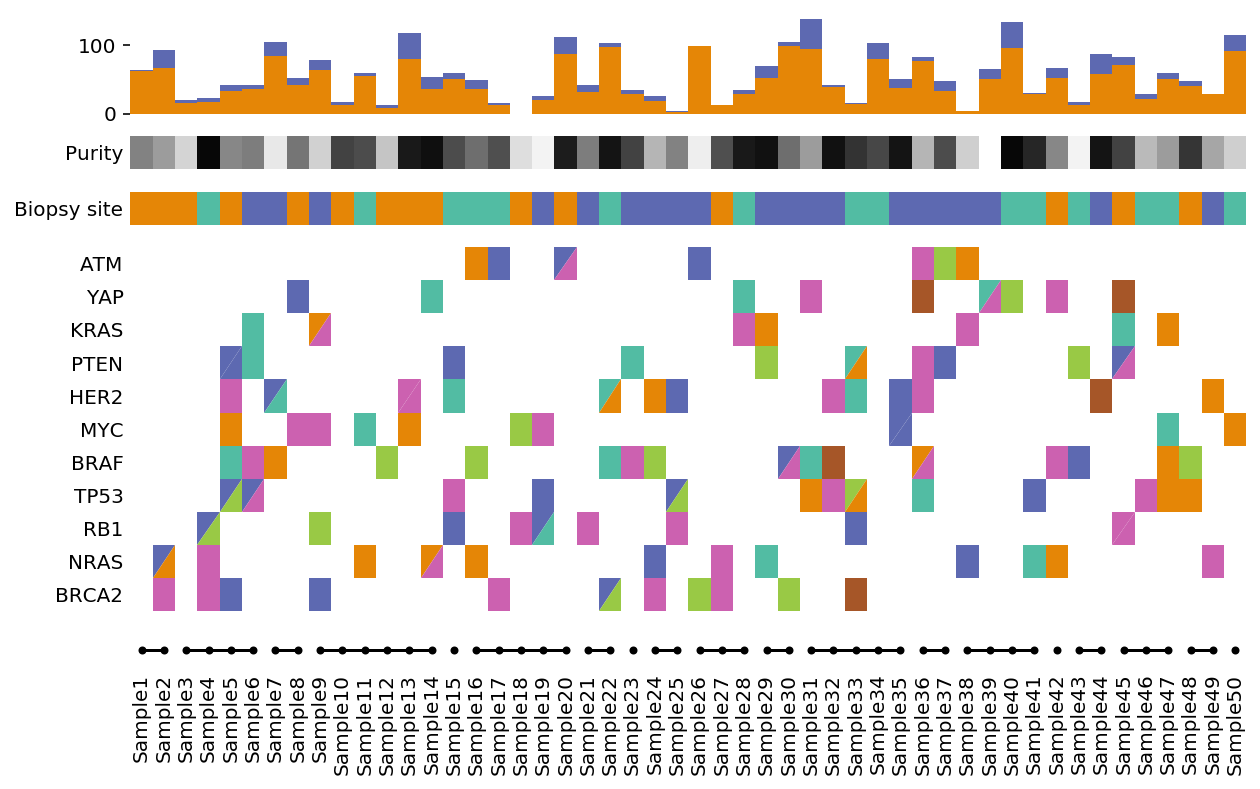

In [29]:
# make CoMut
toy_comut = comut.CoMut()
toy_comut.samples = samples

# add sample indicators first
toy_comut.add_sample_indicators(indicator_df)

toy_comut.add_categorical_data(mut_df)
toy_comut.add_categorical_data(biopsy_df)
toy_comut.add_continuous_data(purity_df)
toy_comut.add_bar_data(mut_burden_df, stacked = True)

toy_comut.plot_comut(figsize = (10,6))

<a id="add_sample_indicators"></a>
### 3.5.3 `add_sample_indicators` arguments

The scope and appearance of sample indicators in the CoMut can be controlled with `add_sample_indicators`. Here is a full list of its arguments:

* `data` - A tidy dataframe that assigns individual samples to groups. The value of the groups does not matter as long as samples in the same group have the same value. Required columns are 'sample' and 'group'. Other columns are ignored.

* `name` - The name of the plot being added to the CoMut, as a string. This is used to edit axes later and put titles in a unified legend. If not given, it will default to the integer number of plots currently in the plot - 1.

* `plot_kwargs` - A dictionary of kwargs to pass to plt.plot during the process of plotting. See [here](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) for a full description of possible arguments. The default for this parameter is `{'color': 'black', 'marker': 'o', markersize': 3}`, meaning black circles are used.

__Example__

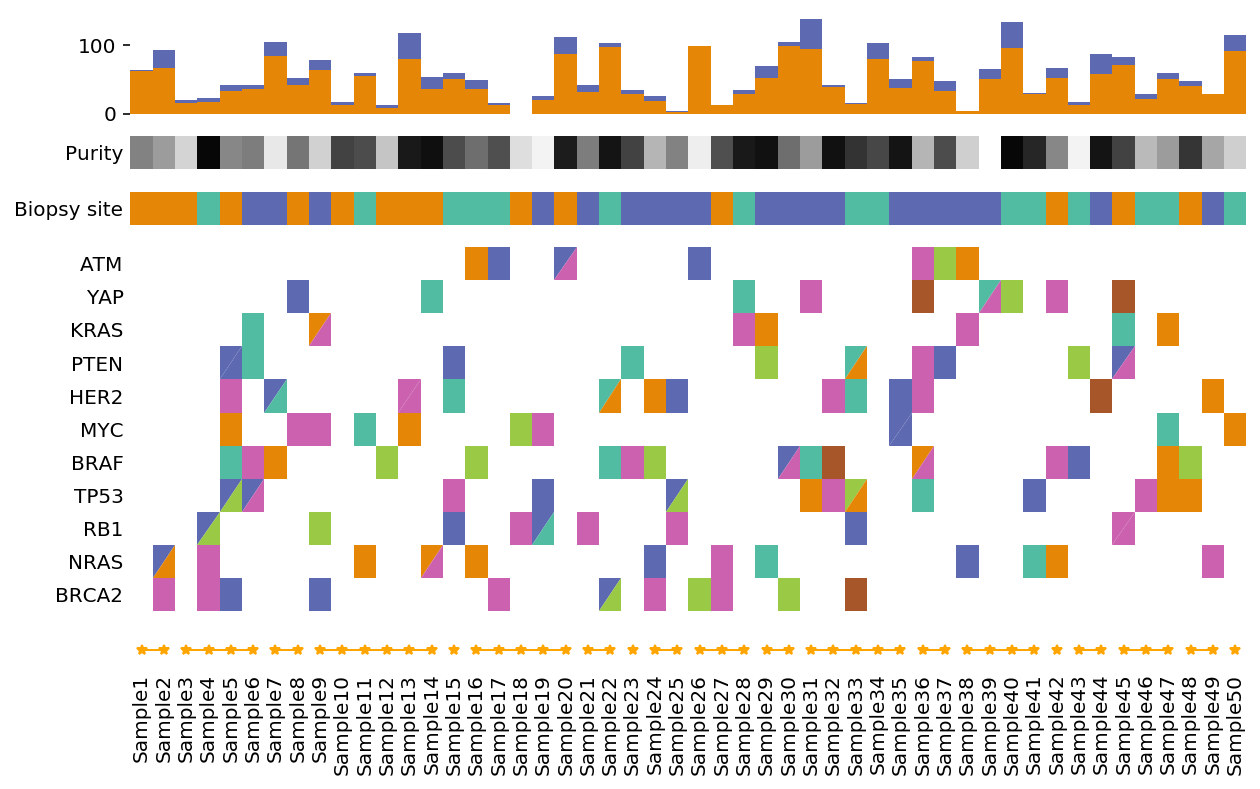

In [30]:
# make CoMut
toy_comut = comut.CoMut()
toy_comut.samples = samples

# add sample indicators first - make them orange and as a star
indicator_kwargs = {'color': 'orange', 'marker': '*', 'linewidth': 1, 'markersize': 5}
toy_comut.add_sample_indicators(indicator_df, plot_kwargs = indicator_kwargs)

toy_comut.add_categorical_data(mut_df)
toy_comut.add_categorical_data(biopsy_df)
toy_comut.add_continuous_data(purity_df)
toy_comut.add_bar_data(mut_burden_df, stacked = True)

toy_comut.plot_comut(figsize = (10,6))

<a id="side_bar_data"></a>
## 3.6 Adding Side Bar Data

3.6.1 - [Side bar data formatting](#side_bar_data_formatting)  
3.6.2 - [Adding side bar data to CoMut](#adding_side_bar_data)  
3.6.3 - [add_side_bar_data arguments](#add_sample_indicators_args)  

Side bar graphs are __category__ level data that can be added to categorical plots in the CoMut. Common examples include the number of mutated samples on the left or significance via something like MutSig on the right. Importantly, side bars give data about __categories__ (usually genes), not samples.

<a id="side_bar_data_formatting"></a>
### 3.6.1 Side bar data formatting

Side bar data, like all data added to the CoMut, is a tidy pandas dataframe. But rather than a required column `sample`, the required column is `category`. Other columns form the data that is added to the CoMut. For example, let's say we had data corresponding to the q values of each gene via something like MutSig:


In [31]:
mutsig_df = pd.read_csv('tutorial_data/tutorial_mutsig_qvals.tsv', sep = '\t')
mutsig_df

,category,-log(Q)
0,BRCA2,0.1
1,NRAS,0.3
2,RB1,0.5
3,TP53,0.8
4,BRAF,1.2
5,MYC,1.5
6,HER2,2.0
7,PTEN,3.0
8,KRAS,4.0
9,YAP,5.0


<a id="adding_side_bar_data"></a>
### 3.6.2 Adding side bar data to CoMut

Side bar data is added with `add_side_bar_data`. An important note is that side bar data cannot be created in isolation - it must be added to an existing __categorical__ plot in the CoMut. This is specified with the `paired_name` argument of `add_side_bar_data`. This is where using the `name` argument of `add_categorical_data` becomes important.

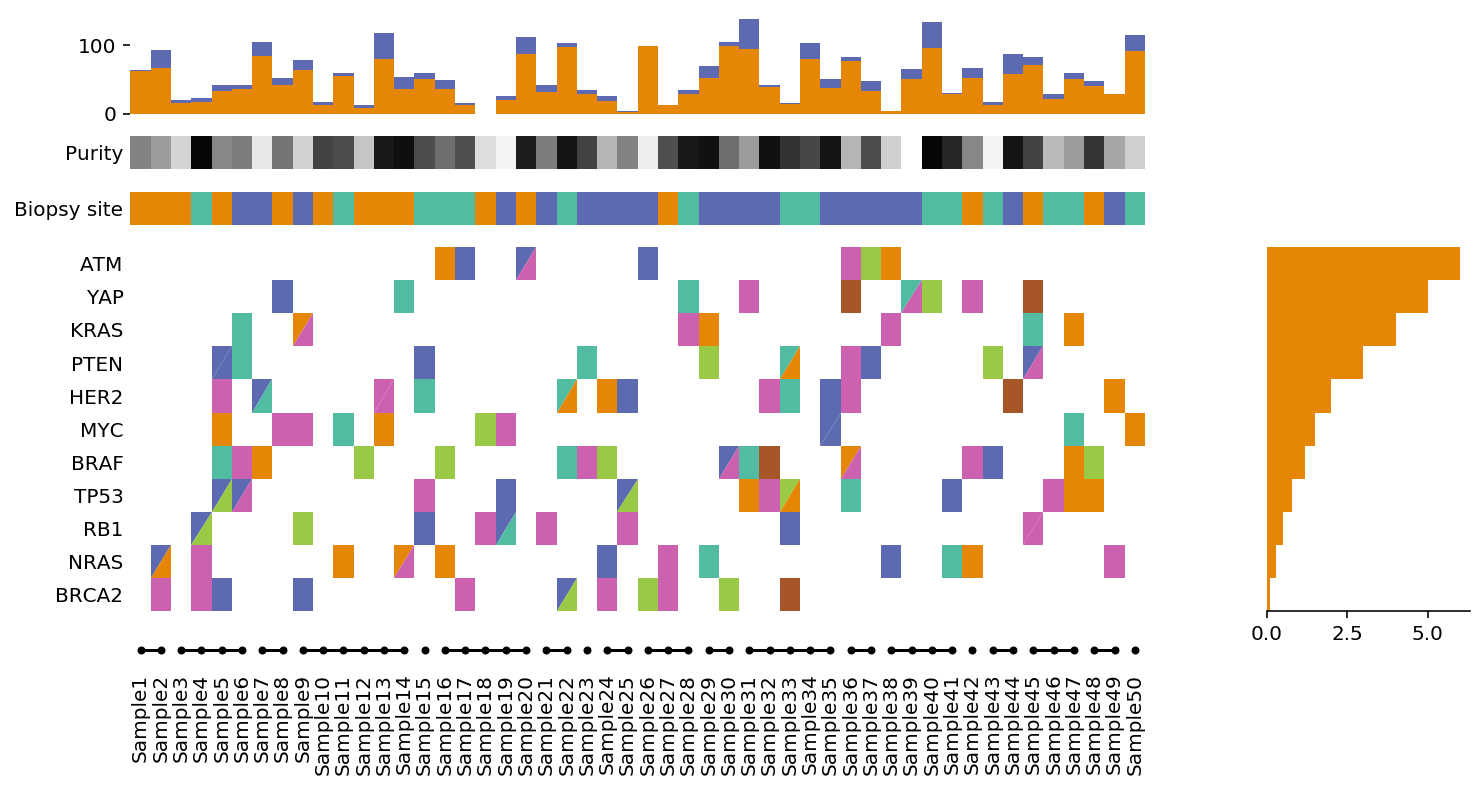

In [32]:
# make CoMut
toy_comut = comut.CoMut()
toy_comut.samples = samples

toy_comut.add_sample_indicators(indicator_df)
toy_comut.add_categorical_data(mut_df, name = 'Mutation type')
toy_comut.add_categorical_data(biopsy_df)
toy_comut.add_continuous_data(purity_df)
toy_comut.add_bar_data(mut_burden_df, stacked = True)

# add side bar data, pair it with the mutation data
toy_comut.add_side_bar_data(mutsig_df, paired_name = 'Mutation type')

toy_comut.plot_comut(figsize = (12,6))

<a id="add_sample_indicators_args"></a>
### 3.6.3 `add_side_bar_data` arguments

The scope and appearance of side bar plots in the CoMut can be controlled with `add_side_bar_data`. This function shares many arguments with `add_bar_data`. Here is a full list of `add_side_bar_data`'s arguments:

* `data` - A tidy dataframe that gives the data for the side bar plot. There is one required column: `category`. Other columns will be interpreted as data for the side bar graph. Only the first column will be used if `stacked = False`

* `paired_name` - The name of the categorical plot that the side bar data should be added to. This is a required argument, and the categories present in the `data` must be a subset of categoires present in the paired plot.

* `name` - The name of the side plot being added to the CoMut, as a string. This is used to edit axes later and put titles in a unified legend. If not given, it will default to the integer number of plots currently in the plot - 1.

* `position` - The position of the side bar data (either `'right'` or `'left'`, defaults to `'right'`). Multiple side bar plots can be added to the same categorical plot - if this happens and their `position` is the same, they will be plotted on top of each other, with the first data added being closest to the CoMut. 

* `stacked` - A boolean for if the data should be stacked or not. Defaults to `False`. Stacked bar graphs will stack by column from left to right, with the the first non-category column being the bottom-most part of the stack. If `False` and multiple non-category columns are present, the first non-category column is used.

* `mapping` - A mapping of column to color. Dictionary should map column name to color (str) as a dictionary.

* `xlabel` - A string with which to label the x axis. Defaults to an empty string, so no x label is given.

* `bar_kwargs` - A dictionary of kwargs to pass to plt.bar during the process of plotting. See [here](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.barh.html) for a full description of possible arguments.

__Example__

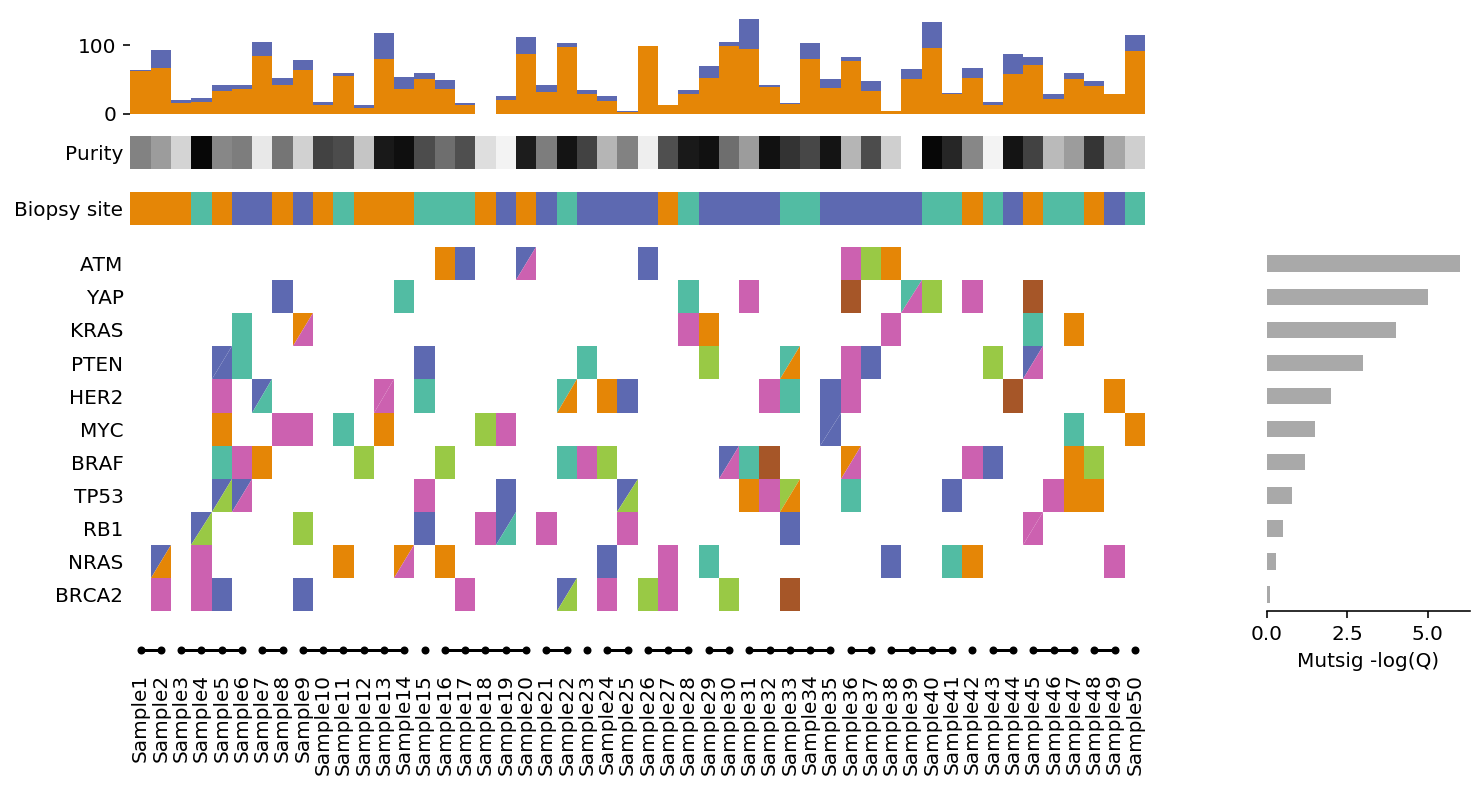

In [33]:
# make CoMut
toy_comut = comut.CoMut()
toy_comut.samples = samples

toy_comut.add_sample_indicators(indicator_df)
toy_comut.add_categorical_data(mut_df, name = 'Mutation type')
toy_comut.add_categorical_data(biopsy_df)
toy_comut.add_continuous_data(purity_df)
toy_comut.add_bar_data(mut_burden_df, stacked = True)

# create mapping for side bar data, make the bars thinner with bar_kwargs
side_mapping = {'-log(Q)': 'darkgrey'}
bar_kwargs = {'height': 0.5}
toy_comut.add_side_bar_data(mutsig_df, paired_name = 'Mutation type', 
                            mapping = side_mapping, xlabel = 'Mutsig -log(Q)', position = 'right', bar_kwargs = bar_kwargs)

toy_comut.plot_comut(figsize = (12,6))

Depending on the size of your CoMut, you may need to move the bar graph closer to the CoMut. You can do this with the [wspace](#spaces) argument of [plot_comut](#plot_comut_args)

<a id="plot_comut"></a>
# 4. Plotting the CoMut

Once data has been added to the CoMut, it has plotted with `comut_name.plot_comut()`. There are several different ways to change the appearance of the CoMut plot:

1. As the data is added with the `add_xxx_data` functions (see each `add` function)
2. With [global matplotlib parameters](#rc_params)
3. With the [arguments](#plot_comut_args) of `plot_comut`
4. By [editing individual axes objects](#axes_editing)

This section focuses on all methods but the first, which is covered in each data type's section. Generally, these methods increase in customizability and complexity (editing axes is very customizable but requires more knowledge of matplotlib).

<a id="rc_params"></a>
## 4.1 Altering Global Matplotlib Params

Because CoMut uses matplotlib to plot, one can use matplotlib [rcParams](https://matplotlib.org/tutorials/introductory/customizing.html) to change the appearance of the CoMut. Generally, this is limited to changing fonts and axes labels. Because these are global parameters, they only need to be set once. Here's an example:

In [34]:
from matplotlib import rcParams
custom_rcParams = {
    'font.family': 'Arial',
}

# change the font to Arial
rcParams.update(custom_rcParams)

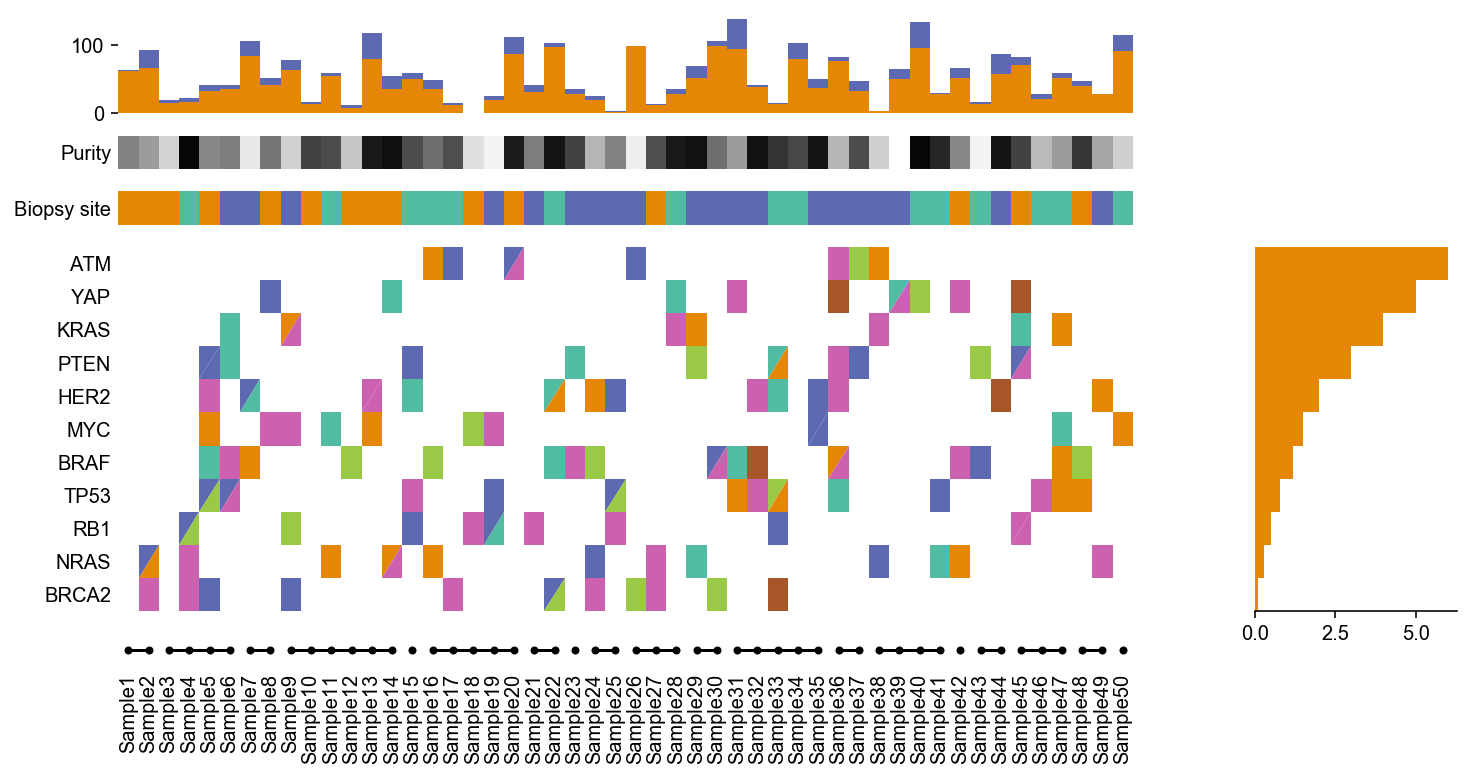

In [35]:
# make CoMut
toy_comut = comut.CoMut()
toy_comut.samples = samples

toy_comut.add_sample_indicators(indicator_df)
toy_comut.add_categorical_data(mut_df, name = 'Mutation type')
toy_comut.add_categorical_data(biopsy_df)
toy_comut.add_continuous_data(purity_df)
toy_comut.add_bar_data(mut_burden_df, stacked = True)
toy_comut.add_side_bar_data(mutsig_df, paired_name = 'Mutation type')

toy_comut.plot_comut(figsize = (12,6))

We can see that the font has changed from previous examples. Because these parameters are global, all future CoMuts made will use these rcParams and have an Arial font.

<a id="plot_comut_args"></a>
## 4.2 Arguments of `plot_comut`

4.2.1 - [Using padding](#padding)  
4.2.2 - [hspace and wspace](#spaces)  
4.2.3 - [Heights and widths](#heights_widths)  
4.2.4 - [structure argument](#structure)  
4.2.5 - [figsize](#figsize)  
4.2.6 - [Advanced usage: fig and spec](#advanced)  

There are a number of arguments to `plot_comut` that one can use to change the appearance of the CoMut. This section explains all of the possible arguments.

<a id="padding"></a>
### 4.2.1 Using padding

Padding can be used to create distance between entries in categorical and clinical data. This is crucial for the clarity of the CoMut and should almost always be used except in larger cohorts where viewing individual samples is infeasible.

There are three types of padding: `x_padding`, which sets the distance between patches in the x_direction, `y_padding`, which sets the distance between patches in the y_direction, and `tri_padding`, which sets the distance between triangles.

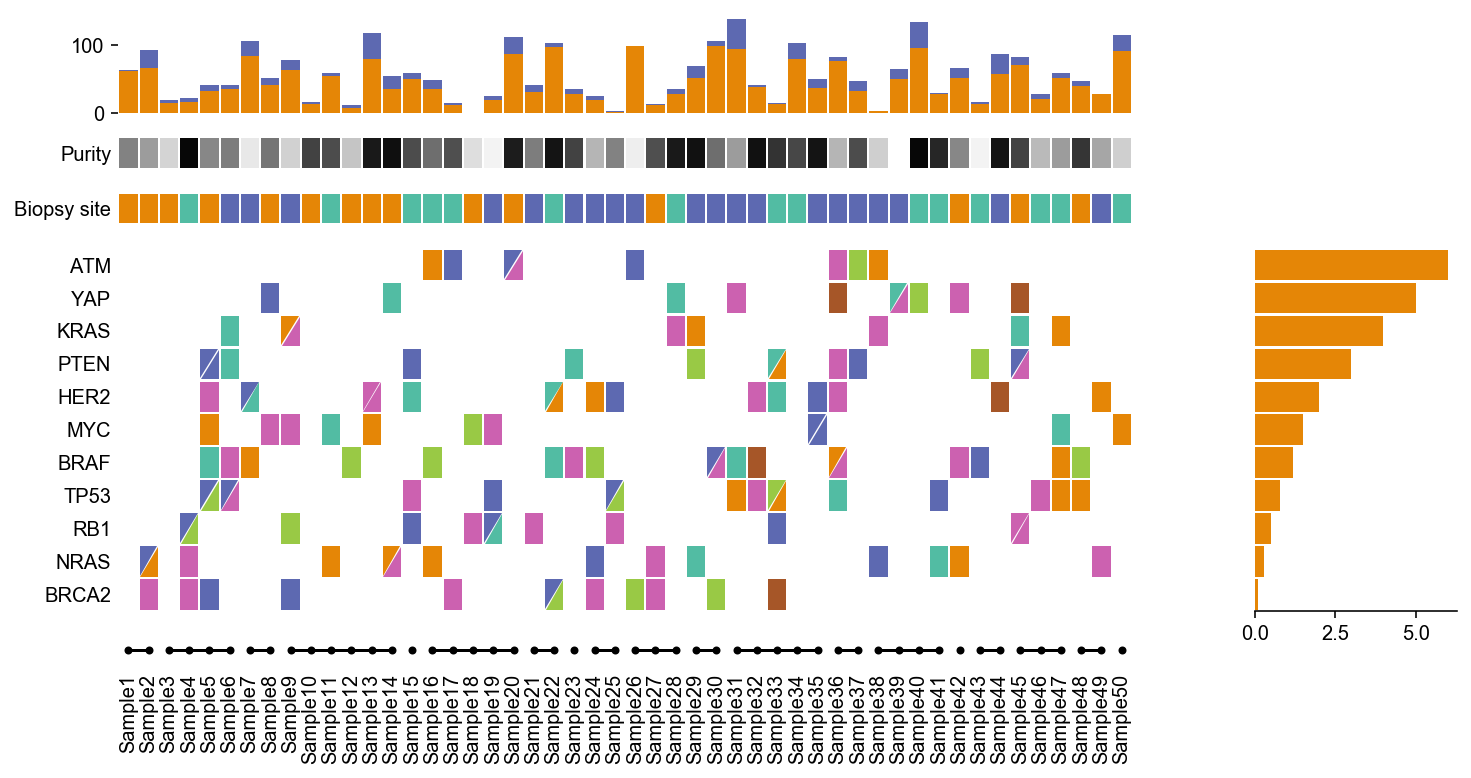

In [36]:
# make CoMut
toy_comut = comut.CoMut()
toy_comut.samples = samples

toy_comut.add_sample_indicators(indicator_df)
toy_comut.add_categorical_data(mut_df, name = 'Mutation type')
toy_comut.add_categorical_data(biopsy_df)
toy_comut.add_continuous_data(purity_df)
toy_comut.add_bar_data(mut_burden_df, stacked = True)
toy_comut.add_side_bar_data(mutsig_df, paired_name = 'Mutation type')

# add padding
toy_comut.plot_comut(x_padding = 0.05, y_padding = 0.04, tri_padding = 0.03, figsize = (12,6))

<a id="spaces"></a>
### 4.2.2 `hspace` and `wspace`

`hspace` and `wspace` set the distance between plots in the CoMut. For example, in the CoMut above, the side bar graph is too far away from the central CoMut and individual plots are far away from each other. `hspace` sets the y distance between plots, while `wspace` sets the distance between the central CoMut and side bar plots. Both default to `0.2`. Here's an example designed to decrease them:

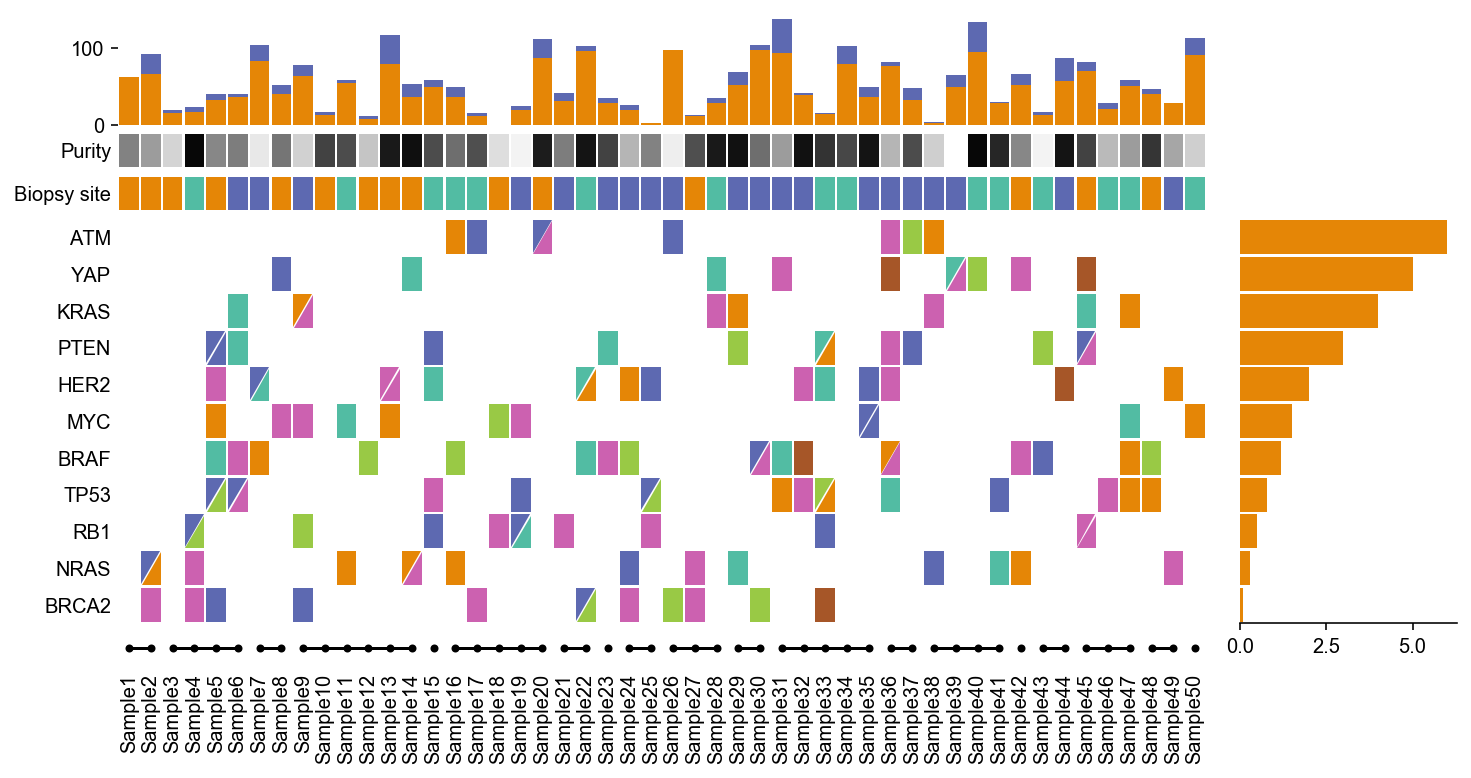

In [37]:
# make CoMut
toy_comut = comut.CoMut()
toy_comut.samples = samples

toy_comut.add_sample_indicators(indicator_df)
toy_comut.add_categorical_data(mut_df, name = 'Mutation type')
toy_comut.add_categorical_data(biopsy_df)
toy_comut.add_continuous_data(purity_df)
toy_comut.add_bar_data(mut_burden_df, stacked = True)
toy_comut.add_side_bar_data(mutsig_df, paired_name = 'Mutation type')

# control hspace and wspace
toy_comut.plot_comut(x_padding = 0.05, y_padding = 0.04, tri_padding = 0.03, hspace = 0.05, wspace = 0.05, figsize = (12,6))

As we can see, individual plots are drawn closer together in the central CoMut, and the side bar graph is drawn closer to the central CoMut.

<a id="heights_widths"></a> 
### 4.2.3 `heights` and `widths`

`heights` and `widths` determine the relative size of plots in the CoMut. This can be useful whenever you want to enlarge or shrink a part of the plot. Note that these arguments control __relative__ size, not absolute size. Absolute size is simply controlled by the size of the figure.

`heights` is a dictionary that controls the relative height of the plots in the CoMut. Keys should be the name of the plots, and values should be the relative height. Heights defaults to the following for each plot type:  
   * Number of categories for categorical data (ex: our mutation data has 11 genes, so its relative height is 11)
   * 1 for continuous data (since only one category can exist)  
   * 3 for bar plots  
   * 1 for sample indicators  
    
`widths` is a list that controls the relative widths of the sideplots in the CoMut vs. the main figure. It's length is the size of the number of sideplots + the main CoMut. It defaults to 1 for side plots and 5 for the main CoMut.

Here is an __example__ where we decrease the size of the side bar graph, shrink the sample indicator plot, and increase the bar graph.

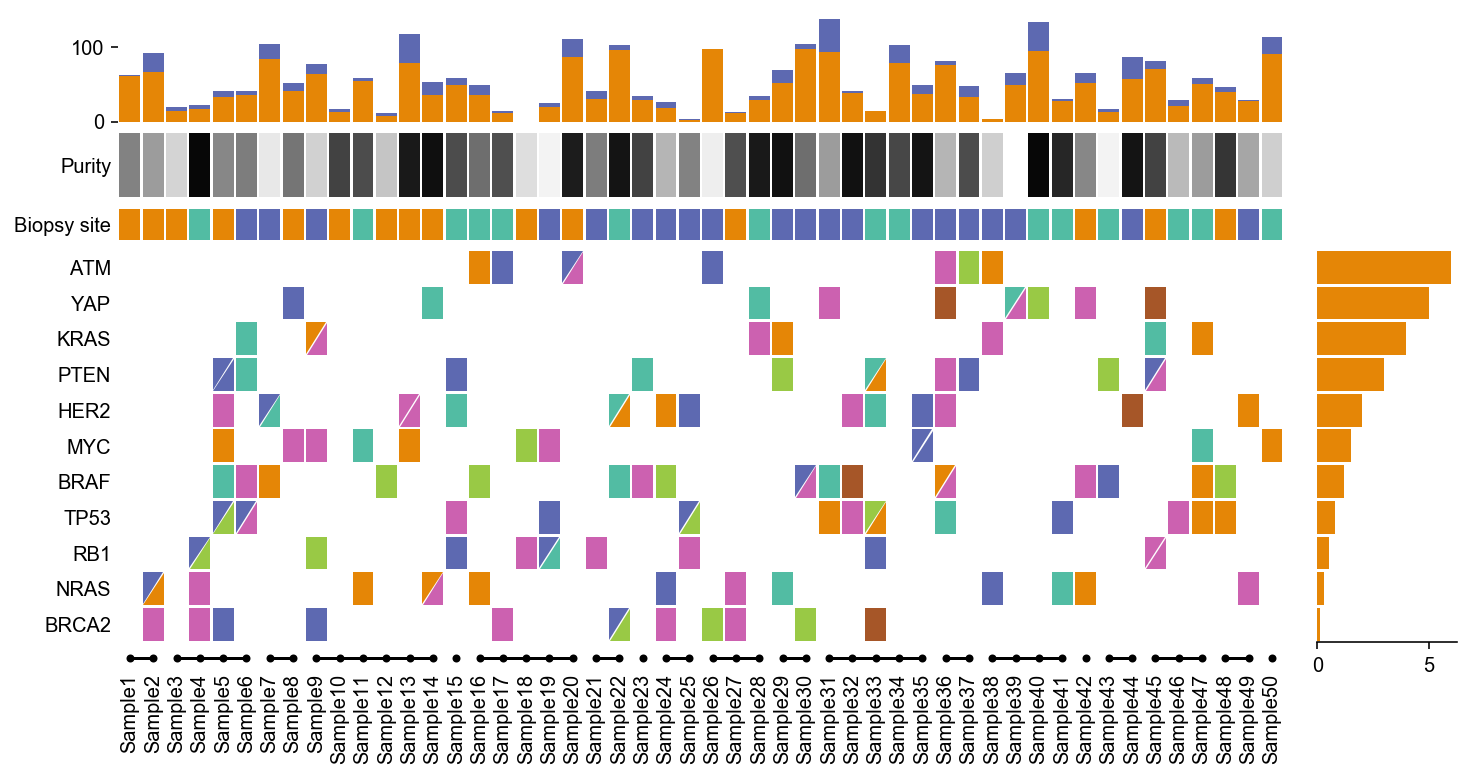

In [38]:
# make CoMut
toy_comut = comut.CoMut()
toy_comut.samples = samples

toy_comut.add_sample_indicators(indicator_df, name = 'Same patient')
toy_comut.add_categorical_data(mut_df, name = 'Mutation type')
toy_comut.add_categorical_data(biopsy_df)
toy_comut.add_continuous_data(purity_df, name = 'Purity')
toy_comut.add_bar_data(mut_burden_df, stacked = True)
toy_comut.add_side_bar_data(mutsig_df, paired_name = 'Mutation type')

# set heights and widths - decrease size of indicators and increase purity
heights = {'Same patient': 0.5, 'Purity': 2}

# set widths - shrink the side bar plot
widths = [5, 0.6]
toy_comut.plot_comut(x_padding = 0.05, y_padding = 0.04, tri_padding = 0.03, hspace = 0.05, wspace = 0.05,
                     heights = heights, widths = widths, figsize = (12,6))

<a id="structure"></a> 
### 4.2.4 `structure` argument

The CoMut's structure can be controlled with the `structure` argument of `plot_comut`. Defined as a list of lists that contain plot names, it can be used to plot only a subset of the data, reorder plots, or condense different plots into one subplot (thereby decreasing the distance between them).

* To reorder data, simply reorder `structure`
* To plot only a subset of the plots, leave plot names out of `structure`
* To condense plots (decrease the distance between any set of adjacent plots), put them into their own list. `subplot_hspace` determines the distance between plots in a subplot.

Note that `structure`, like most CoMut functions, operates from the bottom up. This means that plots placed at the beginning of structure will be plotted at the __bottom__ of the CoMut

Here is an __example:__

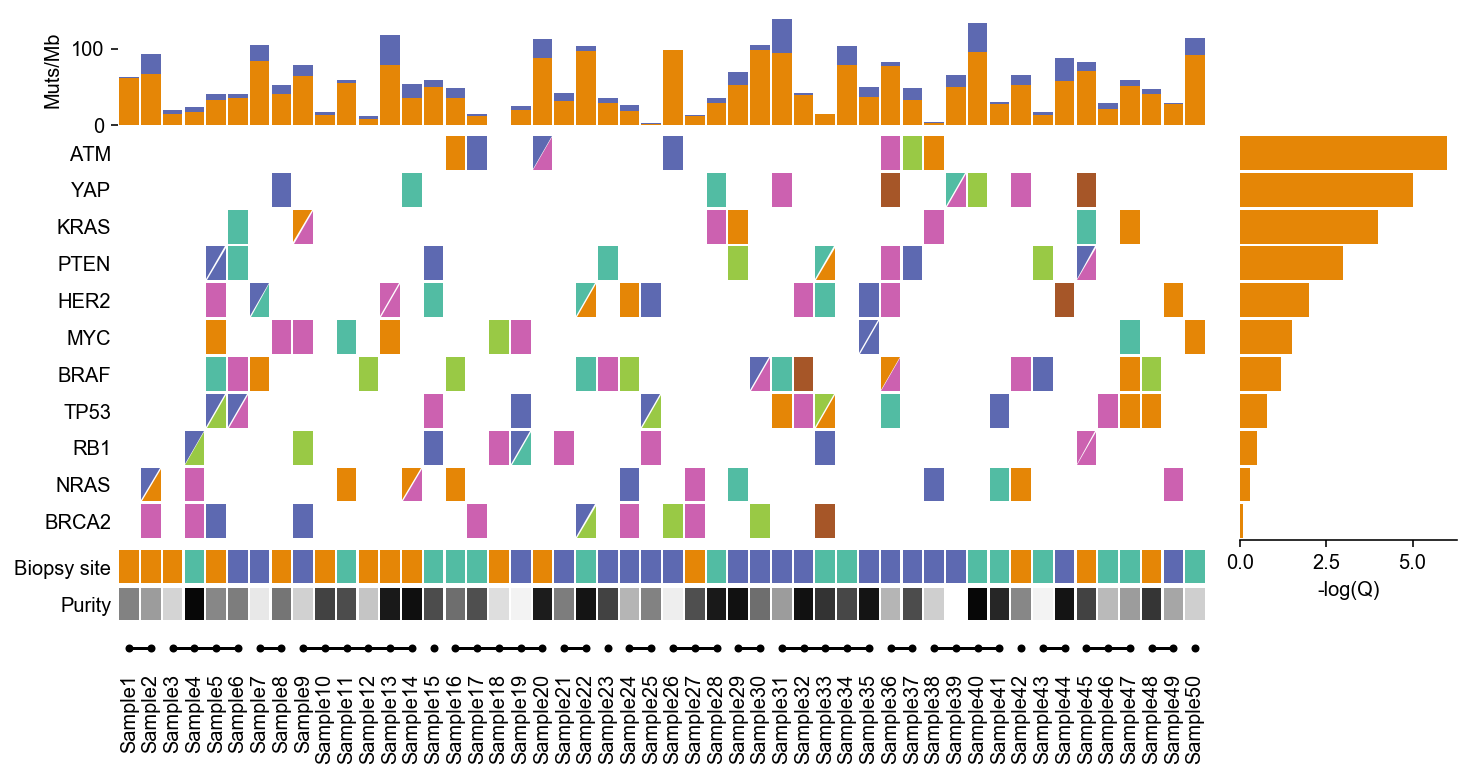

In [39]:
# make CoMut
toy_comut = comut.CoMut()

# add data. Structure requires that data be named
toy_comut.add_sample_indicators(indicator_df, name = 'Same patient')
toy_comut.add_categorical_data(mut_df, name = 'Mutation type')
toy_comut.add_categorical_data(biopsy_df, name = 'Biopsy site')
toy_comut.add_continuous_data(purity_df, name = 'Purity')
toy_comut.add_bar_data(mut_burden_df, stacked = True, name = 'Mutation burden', ylabel = 'Muts/Mb')
toy_comut.add_side_bar_data(mutsig_df, paired_name = 'Mutation type', name = 'MutsigQ', xlabel = '-log(Q)')

# set structure - put purity and biopsy site together, decrease the space between them, 
# and move them before mutation type
structure = [['Same patient'], ['Purity', 'Biopsy site'], ['Mutation type'], ['Mutation burden']]
toy_comut.plot_comut(x_padding = 0.05, y_padding = 0.04, tri_padding = 0.03, hspace = 0.05, wspace = 0.05,
                     structure = structure, subplot_hspace = 0.01, figsize = (12,6))

We can see that Biopsy site and Purity and placed closer together, and they're moved to the bottom of the CoMut.

<a id="figsize"></a> 
### 4.2.5 - Controlling CoMut size with `figsize`

The `figsize` argument of `plot_comut` will control the size of the CoMut. This is the best way to scale the appearance of the squares in the CoMut.

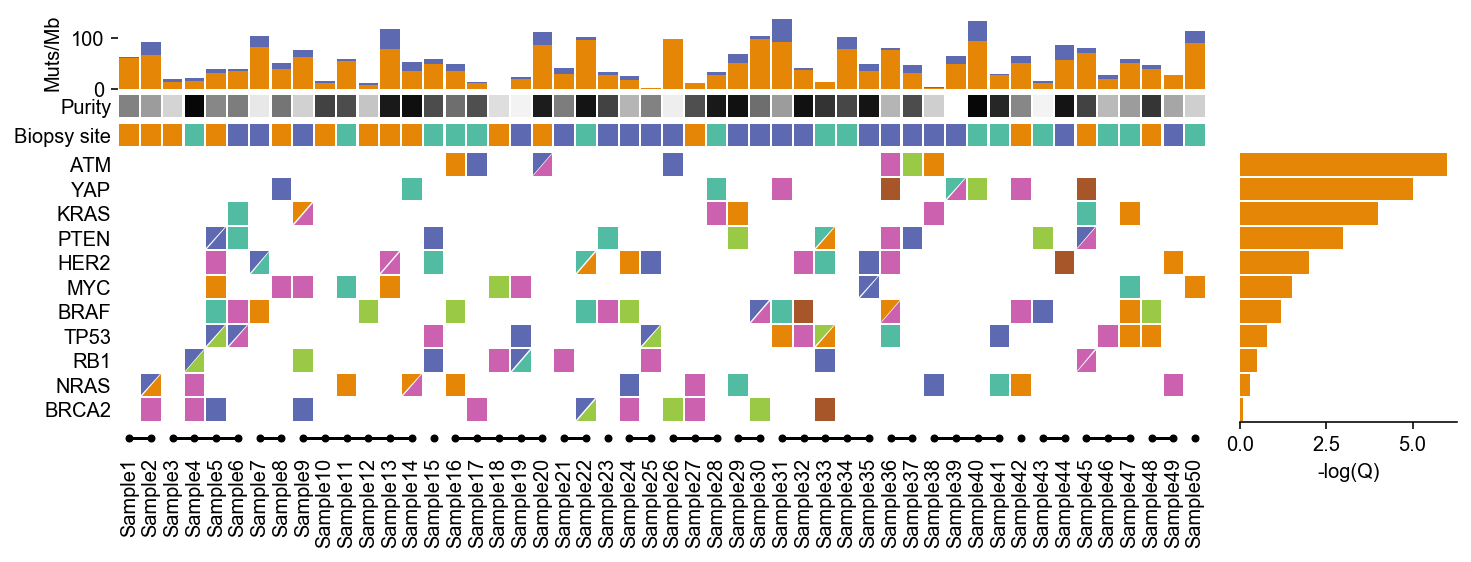

In [40]:
# make CoMut
toy_comut = comut.CoMut()

# add data. Structure requires that data be named
toy_comut.add_sample_indicators(indicator_df, name = 'Same patient')
toy_comut.add_categorical_data(mut_df, name = 'Mutation type')
toy_comut.add_categorical_data(biopsy_df, name = 'Biopsy site')
toy_comut.add_continuous_data(purity_df, name = 'Purity')
toy_comut.add_bar_data(mut_burden_df, stacked = True, name = 'Mutation burden', ylabel = 'Muts/Mb')
toy_comut.add_side_bar_data(mutsig_df, paired_name = 'Mutation type', name = 'MutsigQ', xlabel = '-log(Q)')

# change figsize to make the CoMut patches look more like squares
toy_comut.plot_comut(x_padding = 0.05, y_padding = 0.04, tri_padding = 0.03, hspace = 0.05, wspace = 0.05,
                     figsize = (12,4))

<a id="advanced"></a> 
### 4.2.6 - Advanced usage: `fig` and `spec`

For more advanced users, the CoMut can be placed inside an existing matplotlib figure object and spec. Here's an example:

Text(0.35, 0.5, 'Different plot')

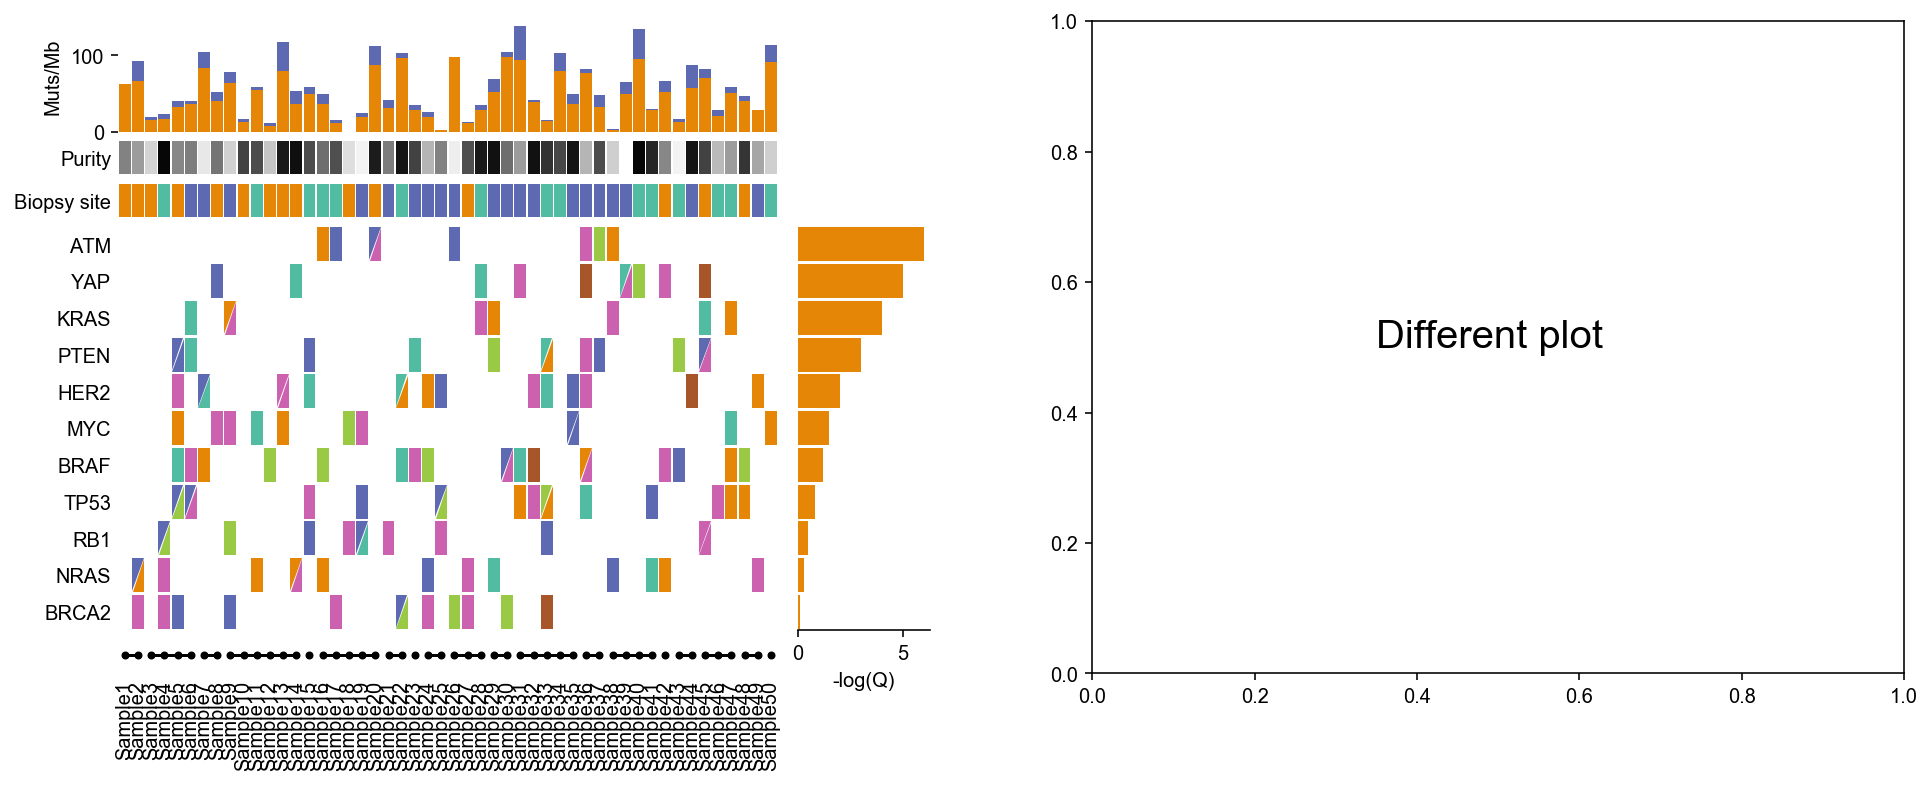

In [41]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(16, 6), tight_layout=False)
gs = fig.add_gridspec(1, 2)

toy_comut.plot_comut(x_padding = 0.05, y_padding = 0.04, tri_padding = 0.03, hspace = 0.05, wspace = 0.05,
                     fig = fig, spec = gs[0])

ax = fig.add_subplot(gs[1])
ax.text(0.35, 0.5, s = 'Different plot', size = 20)

<a id="axes_editing"></a>
## 4.3 Editing Individual Axes

By far the best way to achieve maximal customization for your CoMut is to edit individual axes objects. For example, we may want to achieve the following:

1. Rotate the mutation burden y label to be horizontal
2. Add a vertical line on -log(Q) = 1 for the mutsig and label those that are significant (-log(Q) > 1)
3. Say we know the following mutations are hotspots: `MYC` in Sample18, `BRAF` in Sample24, and `PTEN` in Sample29. We'd like to indicate these with a star.
4. We might want to remove the sample labels, as they're not useful for our story and we don't reference individual samples later.

All of these things can be handled by editing the axes individually. `comut.plot_comut` updates the `comut.axes` attribute of the CoMut object to contain the axis objects. To view the figure after editing the axis, you can use `comut.figure`

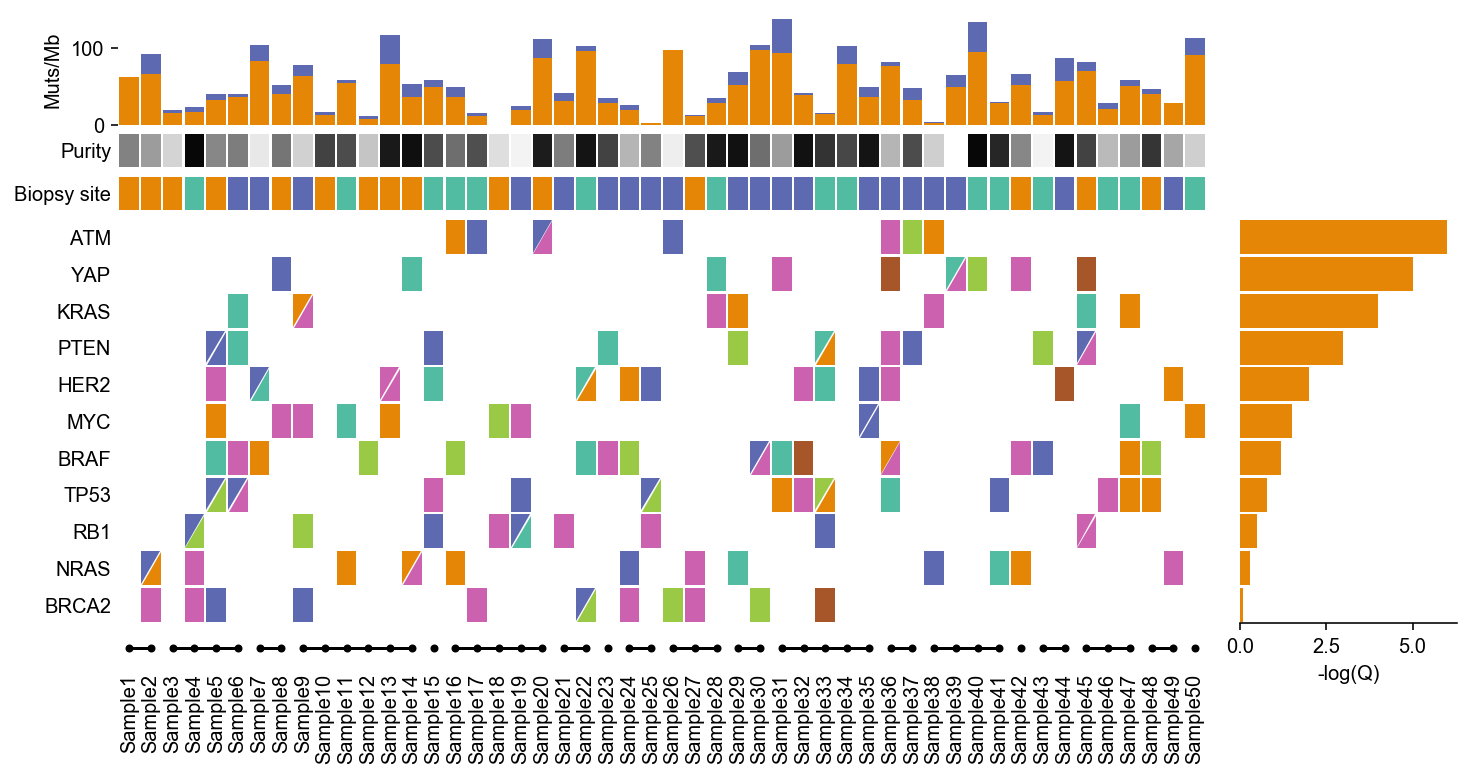

In [42]:
# plot comut
toy_comut.plot_comut(x_padding = 0.05, y_padding = 0.04, tri_padding = 0.03, hspace = 0.05, wspace = 0.05, figsize = (12,6))

Here are the axes objects after the CoMut has been plotted. To access any of them, simply index into the dictionary.

In [43]:
toy_comut.axes

{'Same patient': <matplotlib.axes._subplots.AxesSubplot at 0x134f95e10>,
 'Mutation type': <matplotlib.axes._subplots.AxesSubplot at 0x134fdb7b8>,
 'MutsigQ': <matplotlib.axes._subplots.AxesSubplot at 0x134fbddd8>,
 'Biopsy site': <matplotlib.axes._subplots.AxesSubplot at 0x1332a1f60>,
 'Purity': <matplotlib.axes._subplots.AxesSubplot at 0x132dc9710>,
 'Mutation burden': <matplotlib.axes._subplots.AxesSubplot at 0x13366d908>}

Any function that can operate on an axis object can act on an axis in the CoMut object. For a full list of axis associated methods, see [here](https://matplotlib.org/1.3.1/api/axes_api.html) (though googling is probably your best bet). With that in mind, we can edit the axes as we intended:

[]

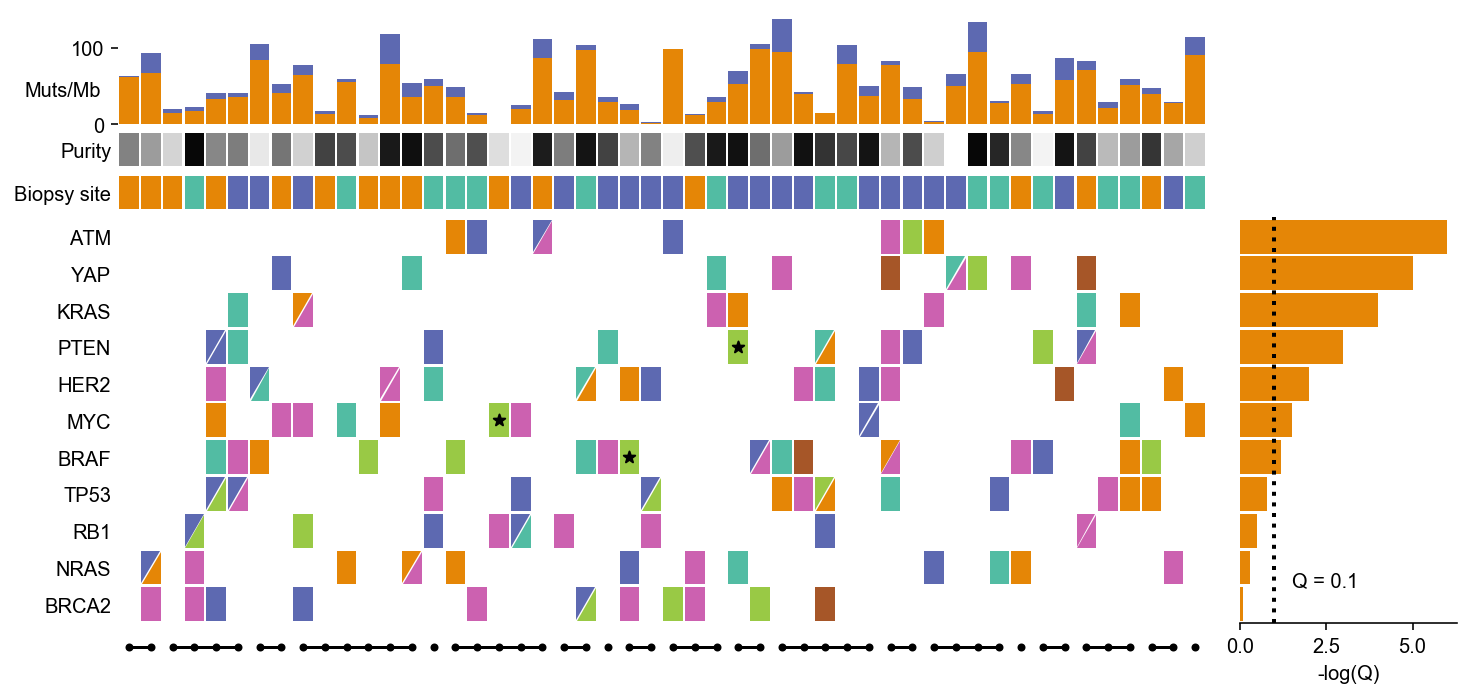

In [44]:
# plot comut
toy_comut.plot_comut(x_padding = 0.05, y_padding = 0.04, tri_padding = 0.03, hspace = 0.05, wspace = 0.05, figsize = (12,6))

# access the mutation part of the CoMut and rotate the y label
toy_comut.axes['Mutation burden'].set_ylabel('Muts/Mb', rotation = 'horizontal', 
                                             ha = 'center', va = 'center', y = 0.3)

# add a vertical line at -log(Q) = 1 and a text box to the mutsig side bar plot
toy_comut.axes['MutsigQ'].axvline(1, color = 'black', linestyle = 'dotted', linewidth = 2)
toy_comut.axes['MutsigQ'].annotate(s = 'Q = 0.1', xy = (1.5, 1.0))

# add stars to hotspot mutations
gene_locs = [4, 5, 7]
sample_locs = [23, 17, 28]
for i in range(3):
    gene_loc, sample_loc = gene_locs[i], sample_locs[i]
    toy_comut.axes['Mutation type'].scatter(x = [sample_loc + 0.5], y = [gene_loc + 0.5], marker = '*', color = 'black', zorder = 2)

# remove sample labels - they always exist attached to the bottom plot
toy_comut.axes['Same patient'].set_xticklabels([])

<a id="add_legend"></a>
# 5 Adding a Legend

No CoMut is completed without a legend. There are two ways that a legend can be added - `comut.add_unified_legend` and `comut.add_axis_legend`. The former will create one legend that will be placed as one column, while the latter provides more flexibility at the cost of manual placement.

## 5.1 Add Unified Legend

Add unified legend is a quick and dirty solution to place one legend on the CoMut object. It is done with `add_unified_legend`, which has the following parameters:
   * `axis_name`: The axis name on which the unified legend should be added. Defaults to the top plot of the comut plot.
   * `border_white`: One can pass a list of values that should be drawn as white patches with a box. Useful for when a value is drawn as a white patch but it should be a white patch with a black border in the legend. 
   * `headers`: the location of the legend subheaders (default left)
   * `rename`: A dictionary that allows for renaming. The old category name should be the key, and the new category name the value. Renaming occurs before `border_white` is applied.
   * `bbox_to_anchor`: argument for specifying where the legend should be located, as a tuple. Defaults to (1,1)
   * `legend_kwargs`: other kwargs to pass to `ax.legend`, which can be found [here](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.legend.html)
   
Here's an __example__

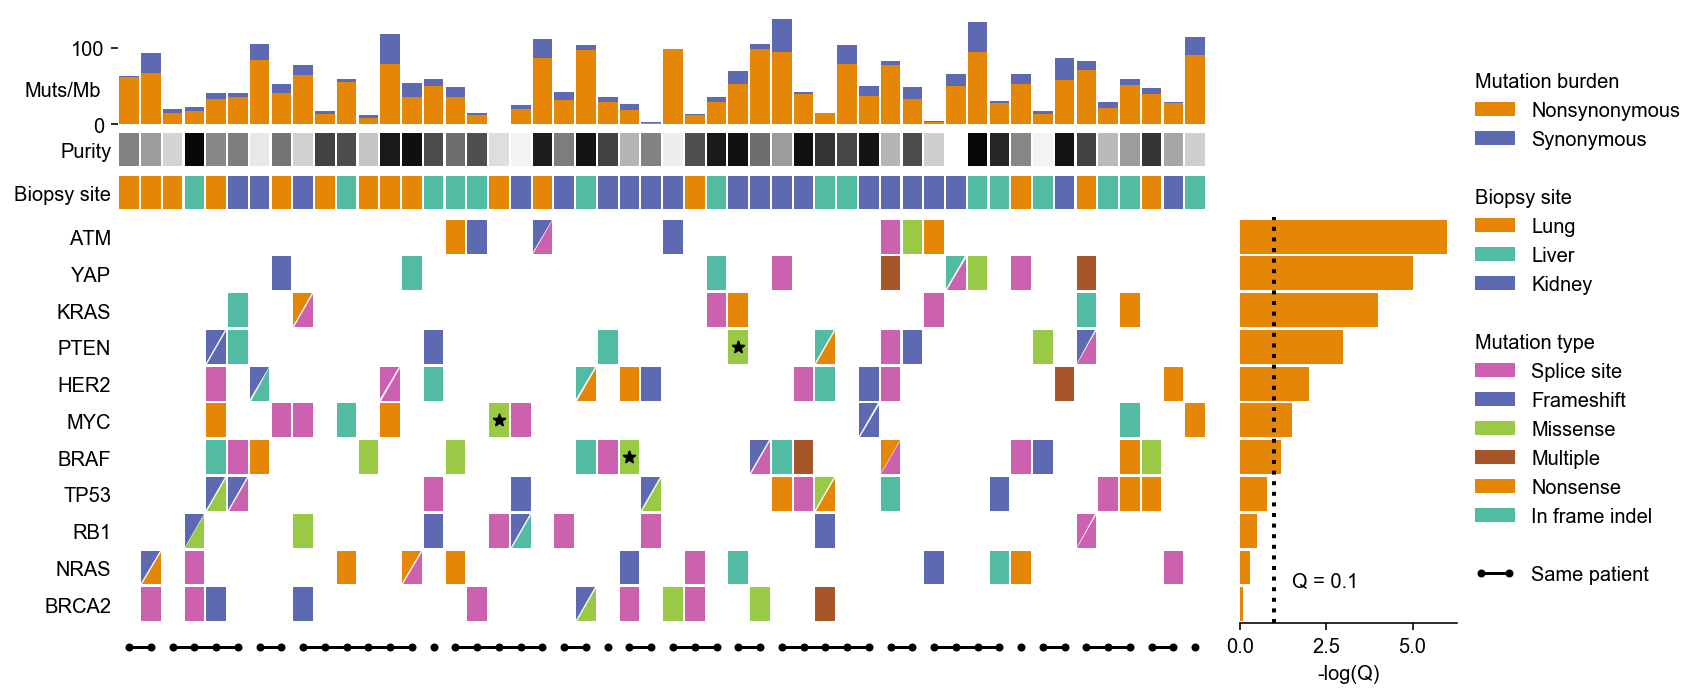

In [45]:
# put legend to the right of the significance plot and shift it up. Numpoints makes 2 points show up in the same patient label
toy_comut.add_unified_legend(axis_name = 'MutsigQ', bbox_to_anchor = (1, 1.4), numpoints = 2)
toy_comut.figure

<a id="axis_legends"></a>
## 5.2 Adding Axes Legends

It might be more aesthetically pleasing, however, to put all the legends in the upper right hand corner in our example. To do this requires more functionality than `add_unified_legend`, so we need to use `add_axis_legend`, which adds individual legends to the axes. Here are its arguments:

* `name`: Name of axis on which to create the legend
* `border_white`: A list of values that should be drawn as white patches with a box. Useful for when a value is drawn as a white patch but it should be a white patch with a black border in the legend. 
* `rename`: A dictionary that allows for renaming. The old category name should be the key, and the new category name the value. Renaming occurs before `border_white` is applied.
* `order`: Order of values in the legend, as a list. Values not in this list will be placed after those in the list, sorted alphabetically.
* `ignored_values`: List of values that should be ignored when making the legend. Defaults to `['Not Available']`
* `title_align`: The alignment of the legend title in the legend. If no title is specified, nothing happens. Valid values are right, left, and center. Defaults to left.
* `legend_kwargs`: other kwargs to pass to `ax.legend`. One important one is `title`, which will usually be used to place a title in that legend.

So we should can legends individually in this way, specifying their location with the legend argument `bbox_to_anchor`

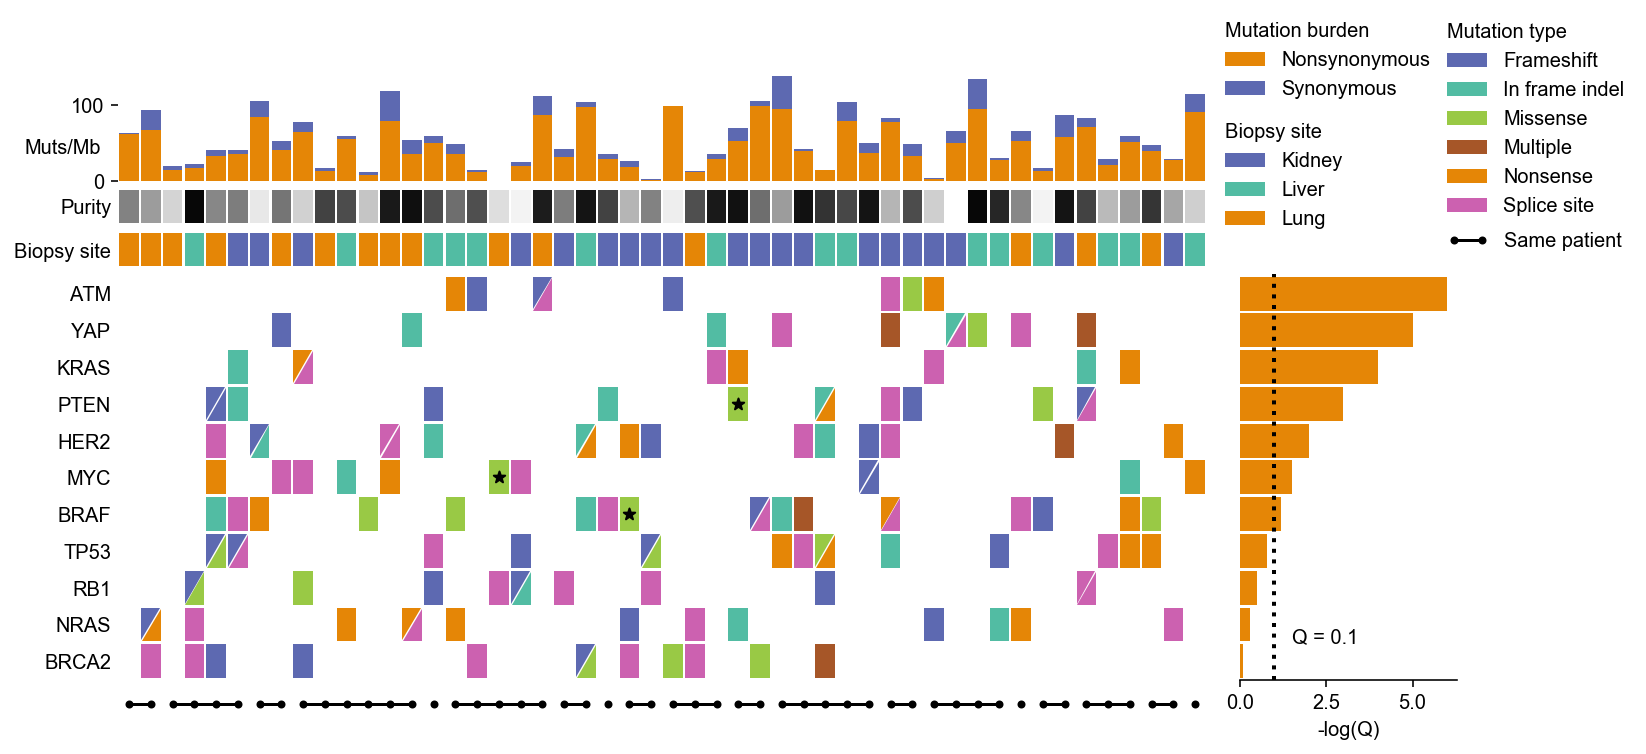

In [46]:
# remove unified legend
if toy_comut.axes['MutsigQ'].get_legend() is not None:
    toy_comut.axes['MutsigQ'].get_legend().remove()

# the add_axis_legend returns a legend that can be edited later
mut_burden_leg = toy_comut.add_axis_legend(name = 'Mutation burden', bbox_to_anchor = (1, 1.6), title = 'Mutation burden')
biopsy_leg = toy_comut.add_axis_legend(name = 'Biopsy site', bbox_to_anchor = (1.0, 4.4), title = 'Biopsy site')
mut_leg = toy_comut.add_axis_legend(name = 'Mutation type', bbox_to_anchor = (1.4, 1.663), title = 'Mutation type')
indicator_leg = toy_comut.add_axis_legend(name = 'Same patient', bbox_to_anchor = (1.397, 13.8), numpoints = 2)

toy_comut.figure

__Note__: If you choose to add axes legends in this manner, it is generally easiest to add them after you've finished editing your CoMut, as `bbox_to_anchor` is a finnicky argument.

<a id="all_together"></a>
# 6 Putting it All Together

In this section, we'll combine everything and produce one polished CoMut from our simulated data:

In [47]:
# we need Line2D to make a star patch for a legend
from matplotlib.lines import Line2D

# we'll use vivid10 for the mutation colors and biopsy site
vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors

# the purity color map will be purples_7 from palettable
purp_7 = palettable.cartocolors.sequential.Purp_7.mpl_colormap

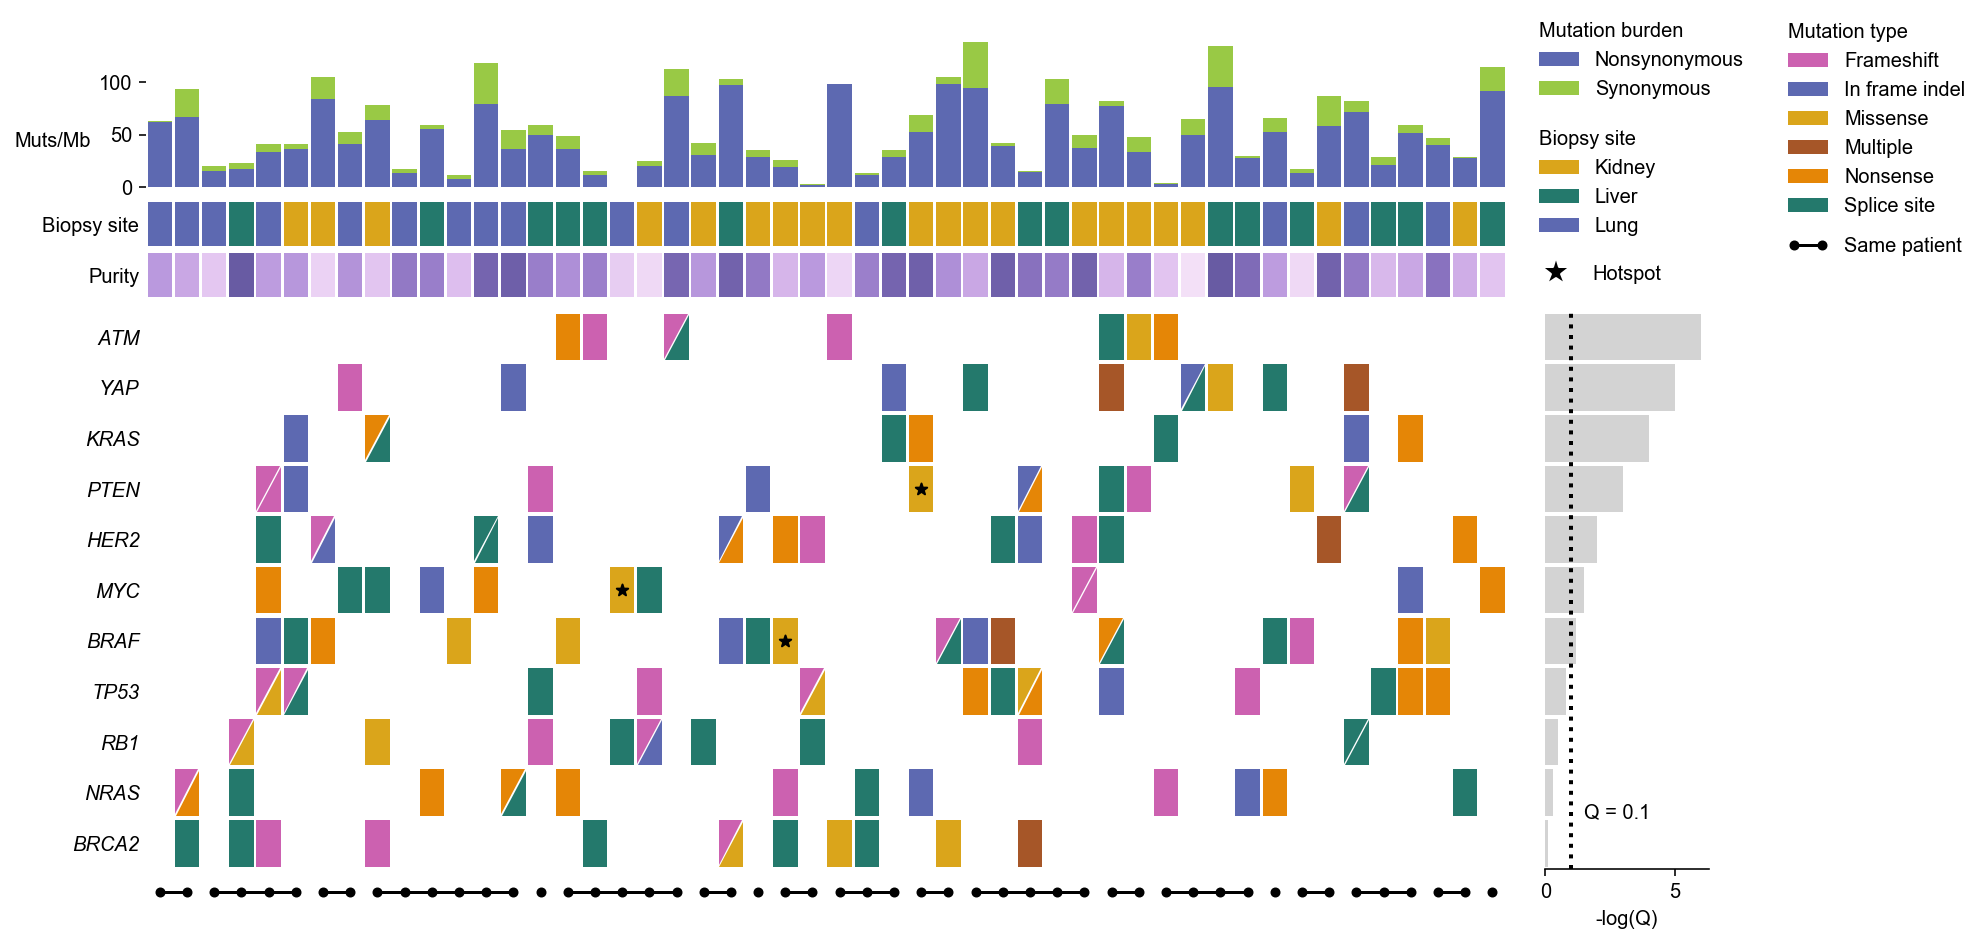

In [48]:
# make CoMut
toy_comut = comut.CoMut()

# set samples
toy_comut.samples = samples

# add sample indicators
toy_comut.add_sample_indicators(indicator_df, name = 'Same patient', plot_kwargs = {'marker': 'o', 'color': 'black', 'ms': 4})

# add mutation dataframe
mut_mapping = {'Missense': vivid_10[6], 'Nonsense': vivid_10[0], 'In frame indel': vivid_10[1],
               'Frameshift': vivid_10[4], 'Splice site': vivid_10[5]}
toy_comut.add_categorical_data(mut_df, name = 'Mutation type', mapping = mut_mapping, tick_style = 'italic')

# add purity data
toy_comut.add_continuous_data(purity_df, name = 'Purity', mapping = purp_7)

# add biopsy data
biopsy_mapping = {'Liver': vivid_10[5], 'Lung': vivid_10[1], 'Kidney': vivid_10[6]}
toy_comut.add_categorical_data(biopsy_df, name = 'Biopsy site', mapping = biopsy_mapping)

# add bar data
bar_mapping = {'Nonsynonymous': vivid_10[1], 'Synonymous': vivid_10[3]}
toy_comut.add_bar_data(mut_burden_df, stacked = True, name = 'Mutation burden', mapping = bar_mapping, ylabel = 'Muts/Mb')

# add side bar data
side_mapping = {'-log(Q)': 'lightgrey'}
toy_comut.add_side_bar_data(mutsig_df, name = 'MutsigQ', position = 'right', paired_name = 'Mutation type', mapping = side_mapping, xlabel = '-log(Q)')

# set heights and widths
heights = {'Same patient': 0.5}
widths = [5, 0.6]

# set structure - put purity and biopsy site together and decrease the space between them
structure = [['Same patient'], ['Mutation type'], ['Purity', 'Biopsy site'], ['Mutation burden']]
toy_comut.plot_comut(x_padding = 0.05, y_padding = 0.04, tri_padding = 0.03, hspace = 0.05, wspace = 0.05,
                     structure = structure, subplot_hspace = 0.01, heights = heights, widths = widths, figsize = (14,8))

# edit individual axes
# access the mutation part of the CoMut and rotate the y label
toy_comut.axes['Mutation burden'].set_ylabel('Muts/Mb', rotation = 'horizontal', 
                                             ha = 'right', va = 'center', y = 0.3)

# add a vertical line at -log(Q) = 1 and a text box to the mutsig side bar plot
toy_comut.axes['MutsigQ'].axvline(1, color = 'black', linestyle = 'dotted', linewidth = 2)
toy_comut.axes['MutsigQ'].annotate(s = 'Q = 0.1', xy = (1.5, 1.0))

# add stars to hotspot mutations
gene_locs = [4, 5, 7]
sample_locs = [23, 17, 28]
for i in range(3):
    gene_loc, sample_loc = gene_locs[i], sample_locs[i]
    toy_comut.axes['Mutation type'].scatter(x = [sample_loc + 0.5], y = [gene_loc + 0.5], marker = '*', color = 'black', zorder = 2)

# remove sample labels - they always exist attached to the bottom plot
toy_comut.axes['Same patient'].set_xticklabels([])

# add legends
mut_burden_leg = toy_comut.add_axis_legend(name = 'Mutation burden', bbox_to_anchor = (1.187, 1.2), title = 'Mutation burden')
biopsy_leg = toy_comut.add_axis_legend(name = 'Biopsy site', bbox_to_anchor = (1.01, 2.7), title = 'Biopsy site')
mut_leg = toy_comut.add_axis_legend(name = 'Mutation type', bbox_to_anchor = (1.35, 1.545), title = 'Mutation type')
indicator_leg = toy_comut.add_axis_legend(name = 'Same patient', bbox_to_anchor = (1.347, 27), numpoints = 2)

# we can even add a 'hotspot' legend. We'll add it to the purity axis since it currently has no legend
star_patch = Line2D([0], [0], marker='*', color='w', label='Hotspot',
                          markerfacecolor='black', markersize=15)
toy_comut.axes['Purity'].legend(handles=[star_patch], loc='center', frameon = False, bbox_to_anchor = (1.067, 0.5))

<a id="exporting"></a>
# 7 Exporting the CoMut

After creating the comut, the figure can be saved using `comut.figure.savefig`. You will likely either using the `.png`, `.jpg`, or `.svg` file formats. `.svg` is usually preferrable because it is infinitely scaleable (meaning that as you zoom into the figure, resolution does not decrease). If `.png`/`.jpg` is required, you can set the resolution on export using `dpi`. `bbox_inches = 'tight'` means the image is cropped to just the CoMut.

In [49]:
toy_comut.figure.savefig('quickstart_images/tutorial_comut.png', bbox_inches = 'tight', dpi = 300)

<a id="pandas_help"></a>
# 8 What to do if you're unfamiliar with pandas

Some level of pandas familiarity is useful for using this package. If you're not savvy with pandas, pandas can read in `.tsv` files with `pd.read_csv(file_path, sep = '\t')`. So, for example, you can subset your maf to the mutations you want to plot using your software of choice (R, excel, whatever), save it as a tsv or file, then read it in with `pd.read_csv()`. All of the data read in for this tutorial is in the form of `.tsv` files in `tutorial_data`, with minimal pandas manipulation. Just be sure to follow what CoMut expects for the various data types.

You can also refer to [quickstart](https://github.com/vanallenlab/comut/blob/master/quickstart.ipynb), which is a notebook that contains easily editable code that you can replace with your own file paths to make basic CoMuts.

# 9 Example of CoMut with data from Liu et al. 2019

In this section, we'll produce the CoMut that is provided in CoMut's manuscript. The data was taken from [Liu, D., Schilling, B., Liu, D. et al. Integrative molecular and clinical modeling of clinical outcomes to PD1 blockade in patients with metastatic melanoma. Nat Med 25, 1916–1927 (2019). https://doi.org/10.1038/s41591-019-0654-5](https://www.nature.com/articles/s41591-019-0654-5) and formatted into the form CoMut expects.

## Import and format data

In [50]:
# import maf and reformat/rename to match what CoMut expects
mutation_df = pd.read_csv('tutorial_data/melanoma_example_data/melanoma_merged_mutations.maf', sep = '\t')
variant_col_df = mafparser.parse_maf(mutation_df)

# import copy number data
copy_number_df = pd.read_csv('tutorial_data/melanoma_example_data/copy_number_alterations.tsv', sep = '\t')

# whole genome doubling data
wgd_df = pd.read_csv('tutorial_data/melanoma_example_data/whole_genome_doubling.tsv', sep = '\t')

# purity data
purity_df = pd.read_csv('tutorial_data/melanoma_example_data/purity.tsv', sep = '\t')

# response data
best_response_df = pd.read_csv('tutorial_data/melanoma_example_data/best_response.tsv', sep = '\t')

# primary type data
primary_type_df = pd.read_csv('tutorial_data/melanoma_example_data/primary_type.tsv', sep = '\t')

# create mutational signature data
mut_sig_df = pd.read_csv('tutorial_data/melanoma_example_data/mutation_signatures.tsv', sep = '\t')

# create mutation burden dataframe
mut_burden_df = pd.read_csv('tutorial_data/melanoma_example_data/mutational_burden.tsv', sep = '\t')

# calculate side bar data from mutation data
mut_freqs = pd.read_csv('tutorial_data/melanoma_example_data/mutation_frequency.tsv', sep = '\t')

## Determine patient order

Order first by response category, then by total mutation burden

In [51]:
# calculate total burden
clinical_data = pd.read_csv('tutorial_data/melanoma_example_data/merged_clinical_data.tsv', sep = '\t')
clinical_data['total_burden'] = clinical_data['clonal_muts'] + clinical_data['subclonal_muts']

# classify best response - CR and PR first, then PD, then MR and SD (from left to right in CoMut)
resp_idx_mapping = {'CR': 2, 'PR': 2, 'PD':1, 'MR': 0, 'SD': 0}
clinical_data['resp_idx'] = clinical_data['BR'].apply(lambda x: resp_idx_mapping[x])

# order first by best response, then by total burden
clinical_data = clinical_data.sort_values(by = ['resp_idx', 'total_burden'], ascending = [False, False])

# the resulting sample column is our sample order
sample_order = clinical_data['sample']

## Define mappings and `add_xxx_data` arguments

In [52]:
balance_6 = palettable.cmocean.diverging.Balance_6.mpl_colors
safe_10 = palettable.cartocolors.qualitative.Safe_10.mpl_colors
vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
purp_7 = palettable.cartocolors.sequential.Purp_7.mpl_colormap

wgd_mapping = {'Yes': {'facecolor': 'black', 'alpha': 0.5}, 'No': 'white'}

cna_mapping = {'Baseline': 'white', 'Allelic amplification': balance_6[-2], 'Allelic deletion': balance_6[1],
               'aCN = 0': {'facecolor': 'black', 'alpha': 0.5}, 'CN-LOH': vivid_10[8], 'Complex': vivid_10[2]}
cna_order = ['CDKN2A', 'TP53', 'MYC']

mut_order = ['CDKN2A', 'TP53', 'NF1', 'NRAS', 'BRAF']
mut_mapping = {'Missense': vivid_10[5], 'Nonsense': vivid_10[0], 'In frame indel': vivid_10[1],
               'Frameshift indel': vivid_10[4], 'Splice site': vivid_10[-1]}

purity_mapping = purp_7

primary_type_mapping = {'Skin':safe_10[2], 'Acral': vivid_10[2], 'Occult': vivid_10[-1], 'Mucosal': vivid_10[4]}

response_mapping = {'SD': balance_6[1], 'MR':  vivid_10[8], 'PR': vivid_10[5], 'CR': vivid_10[3], 'PD':  vivid_10[0]}

sig_bar_kwargs = {'edgecolor': 'white', 'width': 0.96, 'linewidth': 0.5}
sig_mapping = {'UV': purp_7(0.2), 'Alkylating': vivid_10[8], 'Aging+':safe_10[2]}

burden_mapping = {'Clonal':vivid_10[8], 'Subclonal':purp_7(0.5)}

side_bar_kwargs = {'alpha': 0.5}
side_mapping = {'Mutated samples': 'darkgrey'}

## Add data to CoMut

In [53]:
melanoma_comut = comut.CoMut()

# define order of comut BEFORE any data is added
melanoma_comut.samples = sample_order

# add wgd, copy number, mutations, purity, primary type, best response, mutational signatures, and mutation burden
melanoma_comut.add_categorical_data(wgd_df, name='WGD', mapping = wgd_mapping)

melanoma_comut.add_categorical_data(copy_number_df, name='Copy number alteration', mapping = cna_mapping,
                                    category_order = cna_order, tick_style='italic')

melanoma_comut.add_categorical_data(variant_col_df, name = 'Mutation type', category_order = mut_order,
                                    mapping = mut_mapping, tick_style = 'italic')

melanoma_comut.add_continuous_data(purity_df, name = 'Purity',  mapping = purp_7)

melanoma_comut.add_categorical_data(primary_type_df, name='Primary type', mapping = primary_type_mapping)

melanoma_comut.add_categorical_data(best_response_df, name='Best response', mapping = response_mapping)

melanoma_comut.add_bar_data(mut_sig_df, name = 'Mutational signatures', mapping = sig_mapping, stacked = True, ylabel = 'Mutational\nsignatures',
                            bar_kwargs = {'edgecolor': 'white', 'width': 0.96, 'linewidth': 0.5})

melanoma_comut.add_bar_data(mut_burden_df, name = 'Mutation clonality', mapping = burden_mapping, stacked = True, 
                            ylabel = 'Nonsyn.\nMutations')

melanoma_comut.add_side_bar_data(mut_freqs, paired_name = 'Mutation type', name = 'Mutated samples', position = 'left', 
                                 mapping = side_mapping, xlabel = 'Mutated samples', bar_kwargs = {'alpha': 0.5})

## Plot CoMut and edit appearance

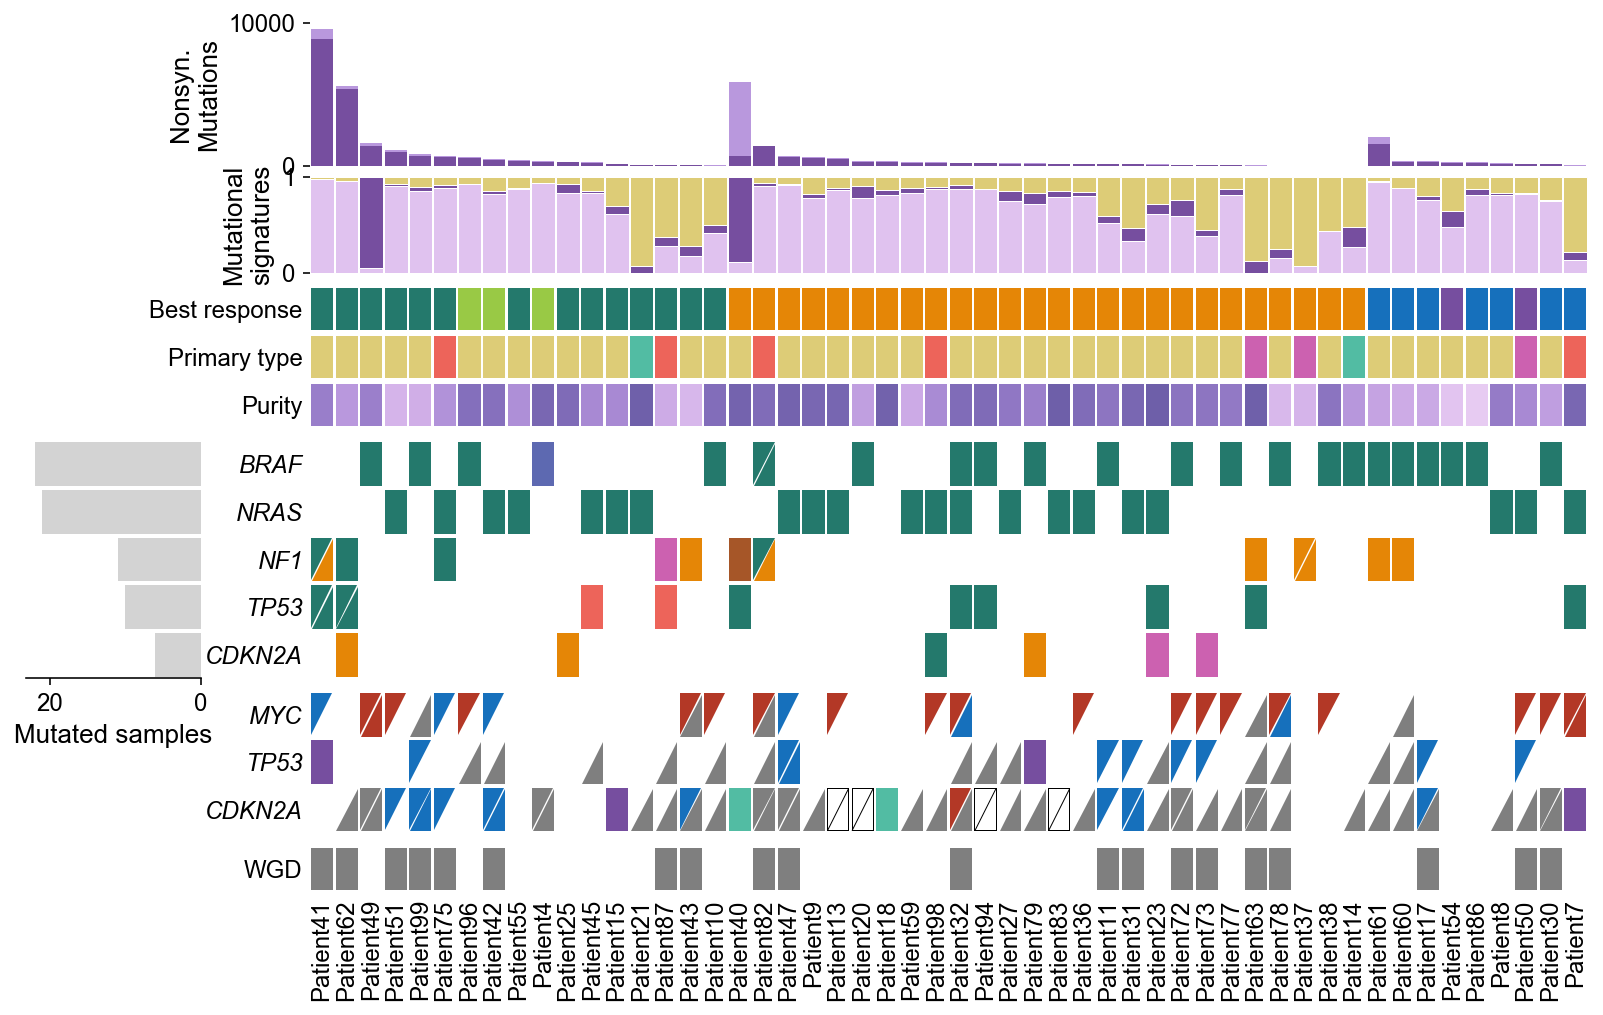

In [54]:
# global matplotlib params
custom_rcParams = {
    'font.family': 'Arial',
    'font.size': 12,
    'axes.labelsize': 13,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
}

rcParams.update(custom_rcParams)

# define structure
structure = [['WGD'],
             ['Copy number alteration'], 
             ['Mutation type'], 
             ['Purity', 'Primary type', 'Best response'], 
             ['Mutational signatures'], 
             ['Mutation clonality']]

#default for bar plots is 3, decrease mutational signatures to 2
heights = {'Mutational signatures': 2}

# decrease size of side bar
widths = [0.6, 4.4]

# move side bar plot closer to CoMut
wspace = 0.15

# plot the comut
melanoma_comut.plot_comut(x_padding = 0.05, y_padding = 0.04, tri_padding = 0.03, hspace = 0.08, structure = structure, subplot_hspace = 0.01,
                          heights = heights, widths = widths, wspace = wspace, figsize = (14, 8))

## Edit individual axes

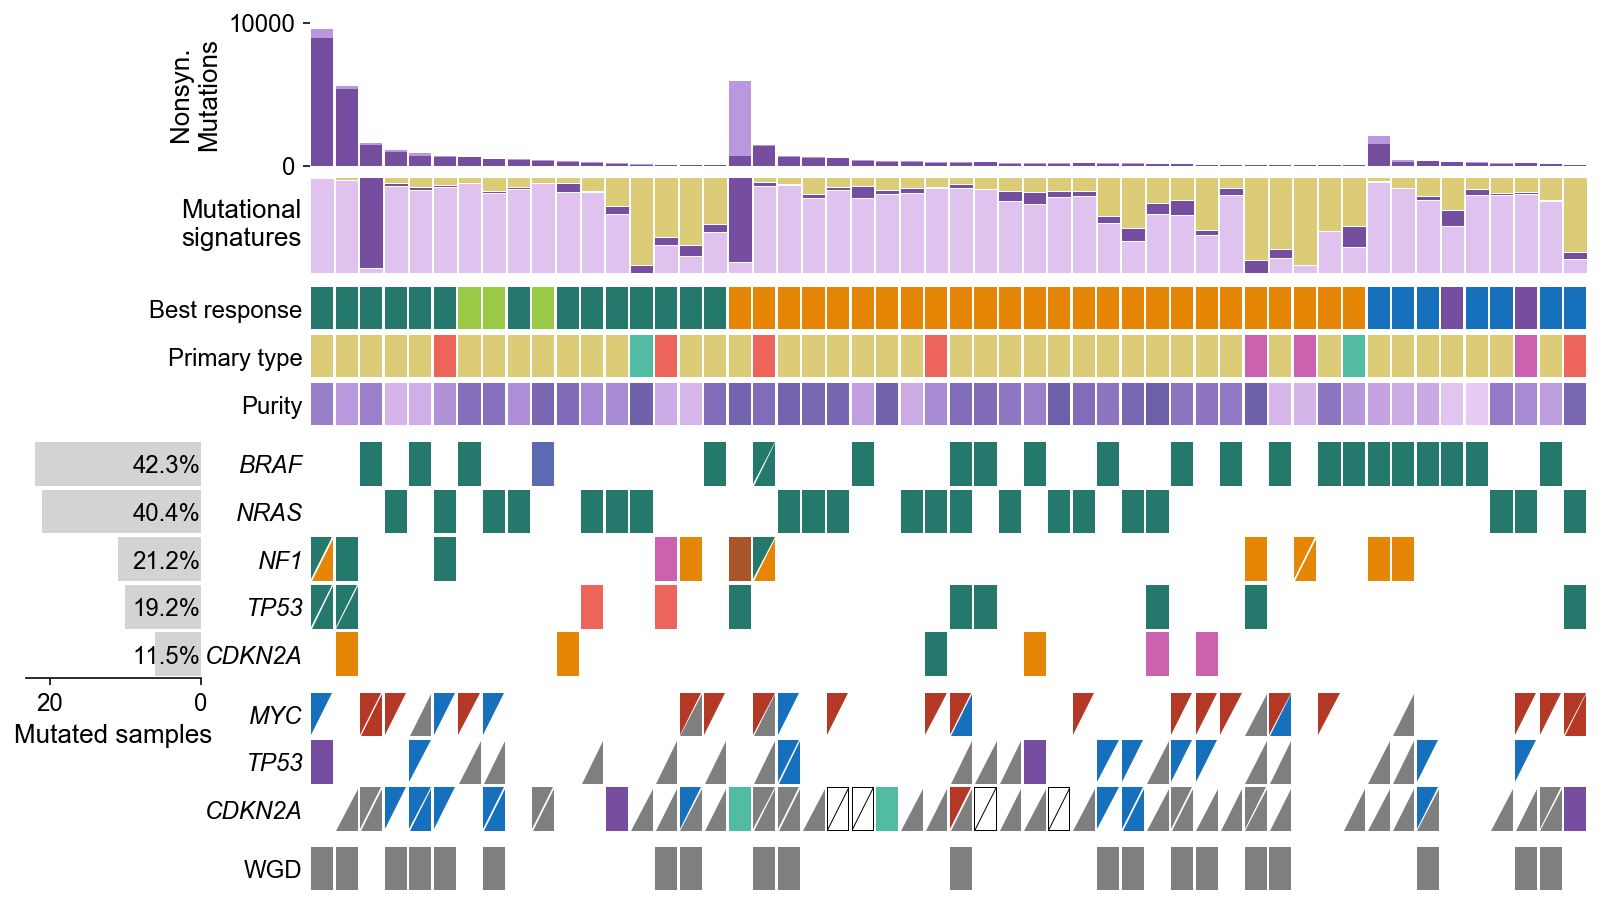

In [55]:
# the sample labels are always added to the bottom plot in the comut
melanoma_comut.axes['WGD'].set_xticklabels([])

# delete the ytick labels for the mutational signature plot. It's implied the scale is 0 - 1. Also add a ylabel
melanoma_comut.axes['Mutational signatures'].tick_params(axis = 'y', which='both', length=0, labelleft=False)
melanoma_comut.axes['Mutational signatures'].set_ylabel('Mutational\nsignatures', rotation = 'horizontal', 
                                                        ha = 'right', va = 'center')

# make it so that there is no annoying scientific notation for the y axis of the burden plot
melanoma_comut.axes['Mutation clonality'].ticklabel_format(axis='y', style='plain')
melanoma_comut.figure

# calculate the percentage of samples with that gene mutated, rounding and adding a percent sign
percentages = (mut_freqs['Mutated samples']/len(sample_order)*100).round(1).astype(str) + '%'

# set location of yticks
melanoma_comut.axes['Mutated samples'].set_yticks([0.5, 1.5, 2.5, 3.5, 4.5])

# set labels of yticks
melanoma_comut.axes['Mutated samples'].set_yticklabels(list(percentages[::-1]))

# move the ytick labels inside the bar graph
melanoma_comut.axes['Mutated samples'].tick_params(axis='y', pad=-34)

# Make y axis visible (by default it is not visible)
melanoma_comut.axes['Mutated samples'].get_yaxis().set_visible(True)

# move y axis ticks to the right
melanoma_comut.axes['Mutated samples'].yaxis.tick_right()

melanoma_comut.figure

## Add a legend

In [57]:
# make a legend for each axis
mut_clon_leg = melanoma_comut.add_axis_legend('Mutation clonality', bbox_to_anchor = (1.203 ,0.8), frameon = False, title = 'Mutation clonality')
mut_sig_leg = melanoma_comut.add_axis_legend('Mutational signatures', bbox_to_anchor = (1.025,1), frameon = False, title = 'Mutational signatures')

# set order for primary type
primary_leg_order = ['Skin', 'Occult', 'Mucosal', 'Acral']
primary_leg = melanoma_comut.add_axis_legend('Primary type', bbox_to_anchor = (1.40, 1.82), frameon = False,
                                             title = 'Primary type', order = primary_leg_order)

# set order for response legend
resp_order = ['CR', 'PR', 'PD', 'SD', 'MR']
response_leg = melanoma_comut.add_axis_legend('Best response', bbox_to_anchor = (1.40, 5.87), frameon = False, order = resp_order,
                                              title = 'Best response')

# set order for mutation legend
mut_leg_order = ['Missense', 'Nonsense', 'Splice site', 'Frameshift indel', 'In frame indel']
mut_leg = melanoma_comut.add_axis_legend('Mutation type', bbox_to_anchor = (1.025, 1.41), frameon = False, 
                                         title = 'Mutation type', order = mut_leg_order)

# set order for cna legend
cna_leg_order = ['Allelic amplification', 'Allelic deletion', 'Allelic CN = 0', 'Baseline', 'CN-LOH', 'Complex']
cna_leg = melanoma_comut.add_axis_legend('Copy number alteration', bbox_to_anchor = (1.025, 1.55), frameon = False, title = 'Copy number\nalteration',
                                        border_white = ['Baseline'], rename = {'aCN = 0': 'Allelic CN = 0'}, order = cna_leg_order)

# add whole genome doubling legend
wgd_leg = melanoma_comut.add_axis_legend('WGD', bbox_to_anchor = (1.43, 8.2), frameon = False, title = 'Whole genome\nduplication (WGD)',
                                         border_white = ['No'], order = ['Yes', 'No'])

melanoma_comut.figure.savefig('quickstart_images/melanoma_comut.svg', bbox_inches = 'tight')